# Initialize

In [1]:
%cd "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics"

/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics


In [2]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.append('NFTF2/v1')
import Bijectors, Distributions, Trainer, Utils # type: ignore

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-06-01 08:37:34.770312: Importing os...
2024-06-01 08:37:34.770593: Importing sys...
Visible devices: [3]
2024-06-01 08:37:34.771233: Importing timer from timeit...
2024-06-01 08:37:34.771405: Setting env variables for tf import (only device(s) [3] will be available)...
2024-06-01 08:37:34.771722: Importing numpy...
2024-06-01 08:37:34.922994: Importing matplotlib...
2024-06-01 08:37:35.249776: Importing h5py...
2024-06-01 08:37:35.272279: Importing importlib.util...
2024-06-01 08:37:35.272388: Importing json...
2024-06-01 08:37:35.272456: Importing pandas...
2024-06-01 08:37:35.603534: Importing random...
2024-06-01 08:37:35.603723: Importing scipy utils...
2024-06-01 08:37:35.939611: Importing subprocess...
2024-06-01 08:37:35.939763: Importing textwrap...
2024-06-01 08:37:35.939831: Importing tensorflow...
Tensorflow version: 2.12.0
2024-06-01 08:37:38.315967: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-06-01 08:37:38.601803: Importing timeit.

# Helper functions

In [3]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_io_kwargs(path_to_results: str) -> Dict[str,Any]:
    return {'results_path': path_to_results,
            'load_weights': True,
            'load_results': True}
    
def get_data_kwargs(seed: int = 0) -> Dict[str,Any]:
    return {'seed': seed}

def get_compiler_kwargs(lr: float,
                        ignore_nans: bool,
                        nan_threshold: float
                       ) -> Dict[str,Any]:
    compiler_kwargs = {'optimizer': {'class_name': 'Custom>Adam', # this gives the new Adam optimizer
    #compiler_kwargs = {'optimizer': {'class_name': 'Adam', # this gives the new Adam optimizer
                                     'config': {'learning_rate': lr,
                                                'beta_1': 0.9,
                                                'beta_2': 0.999,
                                                'epsilon': 1e-07,
                                                'amsgrad': True}},
                       'metrics': [{'class_name': 'MinusLogProbMetric',
                                    'config': {'ignore_nans': ignore_nans, 
                                               'debug_print_mode': False}}],
                       'loss': {'class_name': 'MinusLogProbLoss', 
                                'config': {'name': "MLP", 
                                           'ignore_nans': ignore_nans, 
                                           'nan_threshold': nan_threshold, 
                                           'debug_print_mode': False}}}
    return compiler_kwargs
    
def get_callbacks_kwargs(checkpoint_path: str,
                         es_min_delta: float,
                         es_patience: int,
                         lr_reduce_factor: float,
                         lr_min_delta: float,
                         lr_patience: int,
                         min_lr: float
                         ) -> List[Dict[str,Any]]:
    callbacks_kwargs = [{'class_name': 'PrintEpochInfo',
                         'config': {}},
                        #{'class_name': 'HandleNaNCallback',
                        # 'config': {'checkpoint_path': checkpoint_path,
                        #            'lr_reduction_factor': lr_reduce_factor_on_nan,
                        #            'random_seed_var': np.random.randint(1000000)}},
                        #{'class_name': 'TerminateOnNaNFractionCallback',
                        # 'config': {'threshold': 0.1,
                        #            'validation_data': X_data_val}},
                        {'class_name': 'ModelCheckpoint',
                         'config': {'filepath': checkpoint_path,
                                    'monitor': 'val_loss',
                                    'save_best_only': True,
                                    'save_weights_only': True,
                                    'verbose': 1,
                                    'mode': 'auto',
                                    'save_freq': 'epoch'}},
                        {'class_name': 'EarlyStopping',
                         'config': {'monitor': 'val_loss', 
                                    'min_delta': es_min_delta, 
                                    'patience': es_patience, 
                                    'verbose': 1,
                                    'mode': 'auto', 
                                    'baseline': None, 
                                    'restore_best_weights': True}},
                        {'class_name': 'ReduceLROnPlateau', 
                         'config': {'monitor': 'val_loss', 
                                    'factor': lr_reduce_factor, 
                                    'min_delta': lr_min_delta, 
                                    'patience': lr_patience, 
                                    'min_lr': min_lr}},
                        {'class_name': 'TerminateOnNaN', 'config': {}}
                        ]
    return callbacks_kwargs

def get_fit_kwargs(batch_size: int,
                   epochs_input: int,
                   validation_data: Tuple[Union[np.ndarray,tf.Tensor],Union[np.ndarray,tf.Tensor]],
                   shuffle: bool,
                   verbose: int
                  ) -> Dict[str,Any]:
    fit_kwargs = {'batch_size': batch_size, 
                  'epochs': epochs_input, 
                  'validation_data': validation_data,
                  'shuffle': shuffle, 
                  'verbose': verbose}
    return fit_kwargs

def train_function(X_data_train: tf.Tensor,
                   Y_data_train: tf.Tensor,
                   X_data_val: tf.Tensor,
                   Y_data_val: tf.Tensor,
                   seed_train: int,
                   run_number: int,
                   base_dist: tfp.distributions.Distribution,
                   hyperparams_dict: Dict[str, Any],
                   n_runs: int,
                   ndims: int,
                   bijector_name: str,
                   nbijectors: int,
                   spline_knots: Union[int,str],
                   range_min: int,
                   hidden_layers: List[int],
                   batch_size: int,
                   epochs_input: int,
                   lr_orig: float,
                   es_min_delta: float,
                   es_patience: int,
                   lr_reduce_factor: float,
                   lr_reduce_factor_on_nan: float,
                   lr_min_delta: float,
                   lr_patience: int,
                   min_lr: float,
                   activation: str,
                   regulariser: Optional[str],
                   eps_regulariser: float,
                   use_batch_norm: bool,
                   training_device: str,
                   path_to_results: str,
                   checkpoint_path: str,
                   max_retry: int,
                   debug_print_mode: bool,
                   nan_threshold: float,
                   results_dict: Dict[str, Any],
                   train: bool = True
                  ) -> Tuple[Dict[str, Any], Trainer.Trainer, Dict[str, Any], int, float]:
    nsamples_train, nsamples_val = X_data_train.shape[0], X_data_val.shape[0]
    succeeded = False
    retry: int = 0
    lr: float = lr_orig
    while not succeeded:
        bijector: tfp.bijectors.Bijector = Bijectors.ChooseBijector(bijector_name = bijector_name,
                                                                    ndims = ndims,
                                                                    spline_knots = spline_knots,
                                                                    nbijectors = nbijectors,
                                                                    range_min = range_min,
                                                                    hidden_layers = hidden_layers,
                                                                    activation = activation,
                                                                    regulariser = regulariser,
                                                                    eps_regulariser = eps_regulariser,
                                                                    perm_style='bi-partition',
                                                                    shuffle='Noshuffle')
        Utils.save_bijector_info(path_to_results, bijector)
        print("Building Trainer NFObject.\n")
        NFObject: Trainer.Trainer = Trainer.Trainer(base_distribution = base_dist,
                                                    flow = bijector, 
                                                    x_data_train = X_data_train,
                                                    y_data_train = Y_data_train,
                                                    io_kwargs = get_io_kwargs(path_to_results = path_to_results),
                                                    data_kwargs = get_data_kwargs(seed = seed_train),
                                                    compiler_kwargs = get_compiler_kwargs(lr = lr,
                                                                                          ignore_nans = True,
                                                                                          nan_threshold = nan_threshold),
                                                    callbacks_kwargs = get_callbacks_kwargs(checkpoint_path = checkpoint_path,
                                                                                            es_min_delta = es_min_delta,
                                                                                            es_patience = es_patience,
                                                                                            lr_reduce_factor = lr_reduce_factor,
                                                                                            lr_min_delta = lr_min_delta,
                                                                                            lr_patience = lr_patience,
                                                                                            min_lr = min_lr),
                                                    fit_kwargs = get_fit_kwargs(batch_size = batch_size,
                                                                                epochs_input = epochs_input,
                                                                                validation_data = (X_data_val, Y_data_val),
                                                                                shuffle = True,
                                                                                verbose = 2),
                                                    debug_print_mode = debug_print_mode)
        trainable_params: int = NFObject.trainable_params
        non_trainable_params: int = NFObject.non_trainable_params
        hyperparams_dict = Utils.update_hyperparams_dict(hyperparams_dict = hyperparams_dict,
                                                         run_number = run_number,
                                                         n_runs = n_runs,
                                                         seeds = [seed_train, 0, 0 , 0],
                                                         nsamples = [nsamples_train, nsamples_val, 0],
                                                         ndims = ndims,
                                                         corr = None,
                                                         bijector_name = bijector_name,
                                                         nbijectors = nbijectors,
                                                         spline_knots = spline_knots,
                                                         range_min = range_min,
                                                         hllabel = '-'.join(str(e) for e in hidden_layers),
                                                         trainable_parameters = trainable_params,
                                                         non_trainable_parameters = non_trainable_params,
                                                         batch_size = batch_size,
                                                         epochs_input = epochs_input,
                                                         activation = activation,
                                                         regulariser = regulariser,
                                                         eps_regulariser = eps_regulariser,
                                                         training_device = training_device)
        Utils.save_hyperparams_dict(path_to_results, hyperparams_dict)
        print(f"Training model with initial learning rate {lr}...")
        print("Train first sample:", X_data_train[0]) # type: ignore
        if train:
            NFObject.train()
        training_time: float = NFObject.training_time # type: ignore
        t_losses_all: list = list(NFObject.history['loss']) # type: ignore
        v_losses_all: list = list(NFObject.history['val_loss']) # type: ignore
        lr_all: list = list(NFObject.history['lr']) # type: ignore
        epochs_output: int = len(t_losses_all)
        training_time: float = NFObject.training_time # type: ignore
        
        if np.isnan(t_losses_all).any():
            print("The loss history contains NaN values.")

        if np.isinf(t_losses_all).any():
            print("The loss history contains Inf values.")

        if len(t_losses_all) > 0:
            if np.isnan(t_losses_all).any() or np.isinf(t_losses_all).any():
                succeeded = False
                seed_train = np.random.randint(1000000)
                lr = lr * lr_reduce_factor_on_nan
                retry = retry + 1
                print(f"Training failed: trying again with seed {seed_train} and lr {lr}.")
            else:
                succeeded = True
                print(f"Training succeeded with seed {seed_train}.")
        else:
            succeeded = False
            seed_train = np.random.randint(1000000)
            lr = lr * lr_reduce_factor_on_nan
            retry = retry + 1
            print(f"Training failed: trying again with seed {seed_train} and lr {lr}.")
            
        if retry > max_retry:
            raise Exception("Training failed for the maximum number of retry.")

        results_dict = Utils.update_results_dict(results_dict = results_dict,
                                                 hyperparams_dict = hyperparams_dict,
                                                 train_loss_history = t_losses_all,
                                                 val_loss_history = v_losses_all,
                                                 lr_history = lr_all,
                                                 epochs_output = epochs_output,
                                                 training_time = training_time)
        
    return hyperparams_dict, NFObject, results_dict, seed_train, training_time # type: ignore

# FlavorFit

## Import samples (and remove zeros)

In [4]:
samples_folder_old = "data/HEPFit_data_flavor/Data_old/"
samples_folder_new = "data/HEPFit_data_flavor/Data_new/"
fig_dir = "data/HEPFit_data_flavor/Data_inspection/"
if os.path.exists(samples_folder_old):
    flavor_dataset_old = np.load(os.path.join(samples_folder_old,"FlavourData.npy"))
else:
    print("Samples OLD not found")
if os.path.exists(samples_folder_new):
    flavor_dataset_new_chains_1 = np.load(os.path.join(samples_folder_new,"FlavourData_new_1.npy"))#.reshape(30000*240,90)
    flavor_dataset_new_chains_2 = np.load(os.path.join(samples_folder_new,"FlavourData_new_2.npy"))#.reshape(30000*240,90)
    flavor_dataset_new_chains_3 = np.load(os.path.join(samples_folder_new,"FlavourData_new_3.npy"))#.reshape(30000*240,90)
else:
    print("Samples NEW not found")

In [5]:
print(np.shape(flavor_dataset_old))
print(np.shape(flavor_dataset_new_chains_1))
print(np.shape(flavor_dataset_new_chains_2))
print(np.shape(flavor_dataset_new_chains_3))

(2400000, 85)
(30000, 240, 91)
(30000, 240, 91)
(30000, 240, 91)


In [6]:
pars_labels_old = [r"$|h_{0}^{(0)}|$",
                   r"$|h_{+}^{(0)}|$",
                   r"$|h_{-}^{(0)}|$",
                   r"$\\arg\\left(h_{0}^{(0)}\\right)$",
                   r"$\\arg\\left(h_{+}^{(0)}\\right)$",
                   r"$\\arg\\left(h_{-}^{(0)}\\right)$",
                   r"$|h_{0}^{(1)}|$",
                   r"$|h_{+}^{(1)}|$",
                   r"$|h_{-}^{(1)}|$",
                   r"$\\arg\\left(h_{0}^{(1)}\\right)$",
                   r"$\\arg\\left(h_{+}^{(1)}\\right)$",
                   r"$\\arg\\left(h_{-}^{(1)}\\right)$",
                   r"$|h_{+}^{(1)}|$",
                   r"$|h_{-}^{(1)}|$",
                   r"$\\arg\\left(h_{+}^{(1)}\\right)$",
                   r"$\\arg\\left(h_{-}^{(1)}\\right)$",
                   r"$|h_{0}^{(\\rm{MP})}|$",
                   r"$\\arg\\left(h_{0}^{(\\rm{MP})}\\right)$",
                   r"$|h_{1}^{(\\rm{MP})}|$",
                   r"$\\arg\\left(h_{1}^{(\\rm{MP})}\\right)$",
                   r"$|h_{2}^{(\\rm{MP})}|$",
                   r"$\\arg\\left(h_{1}^{(\\rm{MP})}\\right)$",
                   r"$F_{Bs}/F_{Bd}$",
                   r"$\\delta Gs_{Gs}$",
                   r"$F_{Bs}$",
                   r"$\\lambda_{8}$",
                   r"$\\alpha_{1}(K^{*})$",
                   r"$\\alpha_{2}(K^{*})$",
                   r"$\\alpha_{2}(\\phi)$",
                   r"$\\alpha_{1}(K^{'})$",
                   r"$LCSRFF_{1}$",
                   r"$LCSRFF_{2}$",
                   r"$LCSRFF_{3}$",
                   r"$LCSRFF_{4}$",
                   r"$LCSRFF_{5}$",
                   r"$LCSRFF_{6}$",
                   r"$LCSRFF_{7}$",
                   r"$LCSRFF_{8}$",
                   r"$LCSRFF_{9}$",
                   r"$LCSRFF_{10}$",
                   r"$LCSRFF_{11}$",
                   r"$LCSRFF_{12}$",
                   r"$LCSRFF_{13}$",
                   r"$LCSRFF_{14}$",
                   r"$LCSRFF_{15}$",
                   r"$LCSRFF_{16}$",
                   r"$LCSRFF_{17}$",
                   r"$LCSRFF_{18}$",
                   r"$LCSRFF_{19}$",
                   r"$LCSRFF_{\\phi 1}$",
                   r"$LCSRFF_{\\phi 2}$",
                   r"$LCSRFF_{\\phi 3}$",
                   r"$LCSRFF_{\\phi 4}$",
                   r"$LCSRFF_{\\phi 5}$",
                   r"$LCSRFF_{\\phi 6}$",
                   r"$LCSRFF_{\\phi 7}$",
                   r"$LCSRFF_{\\phi 8}$",
                   r"$LCSRFF_{\\phi 9}$",
                   r"$LCSRFF_{\\phi 10}$",
                   r"$LCSRFF_{\\phi 11}$",
                   r"$LCSRFF_{\\phi 12}$",
                   r"$LCSRFF_{\\phi 13}$",
                   r"$LCSRFF_{\\phi 14}$",
                   r"$LCSRFF_{\\phi 15}$",
                   r"$LCSRFF_{\\phi 16}$",
                   r"$LCSRFF_{\\phi 17}$",
                   r"$LCSRFF_{\\phi 18}$",
                   r"$LCSRFF_{\\phi 19}$",
                   r"$LATFF_{11}$",
                   r"$LATFF_{12}$",
                   r"$LATFF_{13}$",
                   r"$LATFF_{14}$",
                   r"$LATFF_{15}$",
                   r"$LATFF_{16}$",
                   r"$LATFF_{17}$",
                   r"$LATFF_{18}$",
                   r"$LATFF_{19}$",
                   r"$c^{LQ}_{2223}$",
                   r"$c^{ed}_{2223}$",
                   r"$c^{Ld}_{2223}$",
                   r"$c^{Qe}_{2223}$",
                   r"$c^{LeqQ}_{2223}$",
                   r"$c^{\\prime\\,LeqQ}_{2223}$",
                   r"$\\log\\mathcal{L}+\\log\\mathcal{P}$",
                   r"$\\log\\mathcal{L}$"
                  ]
pars_labels_new = [r"$|h_{0}^{(0)}|$",
                   r"$|h_{+}^{(0)}|$",
                   r"$|h_{-}^{(0)}|$",
                   r"$\arg\left(h_{0}^{(0)}\right)$",
                   r"$\arg\left(h_{+}^{(0)}\right)$",
                   r"$\arg\left(h_{-}^{(0)}\right)$",
                   r"$|h_{0}^{(1)}|$",
                   r"$|h_{+}^{(1)}|$",
                   r"$|h_{-}^{(1)}|$",
                   r"$\arg\left(h_{0}^{(1)}\right)$",
                   r"$\arg\left(h_{+}^{(1)}\right)$",
                   r"$\arg\left(h_{-}^{(1)}\right)$",
                   r"$|h_{+}^{(2)}|$",
                   r"$|h_{-}^{(2)}|$",
                   r"$\arg\left(h_{+}^{(2)}\right)$",
                   r"$\arg\left(h_{-}^{(2)}\right)$",
                   r"$|h_{0}^{(\rm{MP})}|$",
                   r"$\arg\left(h_{0}^{(\rm{MP})}\right)$",
                   r"$|h_{1}^{(\rm{MP})}|$",
                   r"$\arg\left(h_{1}^{(\rm{MP})}\right)$",
                   r"$|h_{2}^{(\rm{MP})}|$",
                   r"$\arg\left(h_{1}^{(\rm{MP})}\right)$",
                   r"$F_{Bs}/F_{Bd}$",
                   r"$\delta Gs_{Gs}$",
                   r"$F_{Bs}$",
                   r"$\lambda_{8}$",
                   r"$\alpha_{1}(K^{*})$",
                   r"$\alpha_{2}(K^{*})$",
                   r"$\alpha_{2}(\phi)$",
                   r"$\alpha_{1}(K^{'})$",
                   r"$a_{0}^{A0}$",
                   r"$a_{0}^{A1}$",
                   r"$a_{0}^{T1}$",
                   r"$a_{0}^{T23}$",
                   r"$a_{0}^{V}$",
                   r"$a_{1}^{A0}$",
                   r"$a_{1}^{A1}$",
                   r"$a_{1}^{A12}$",
                   r"$a_{1}^{T1}$",
                   r"$a_{1}^{T2}$",
                   r"$a_{1}^{T23}$",
                   r"$a_{1}^{V}$",
                   r"$a_{2}^{A0}$",
                   r"$a_{2}^{A1}$",
                   r"$a_{2}^{A12}$",
                   r"$a_{2}^{T1}$",
                   r"$a_{2}^{T2}$",
                   r"$a_{2}^{T23}$",
                   r"$a_{2}^{V}$",
                   r"$a_{0\,\phi}^{A0}$",
                   r"$a_{0\,\phi}^{A1}$",
                   r"$a_{0\,\phi}^{T1}$",
                   r"$a_{0\,\phi}^{T23}$",
                   r"$a_{0\,\phi}^{V}$",
                   r"$a_{1\,\phi}^{A0}$",
                   r"$a_{1\,\phi}^{A1}$",
                   r"$a_{1\,\phi}^{A12}$",
                   r"$a_{1\,\phi}^{T1}$",
                   r"$a_{1\,\phi}^{T2}$",
                   r"$a_{1\,\phi}^{T23}$",
                   r"$a_{1\,\phi}^{V}$",
                   r"$a_{2\,\phi}^{A0}$",
                   r"$a_{2\,\phi}^{A1}$",
                   r"$a_{2\,\phi}^{A12}$",
                   r"$a_{2\,\phi}^{T1}$",
                   r"$a_{2\,\phi}^{T2}$",
                   r"$a_{2\,\phi}^{T23}$",
                   r"$a_{2\,\phi}^{V}$",
                   r"$b_{0\,f_{0}}$",
                   r"$b_{0\,f_{T}}$",
                   r"$b_{0\,f_{+}}$",
                   r"$b_{1\,f_{0}}$",
                   r"$b_{1\,f_{T}}$",
                   r"$b_{1\,f_{+}}$",
                   r"$b_{2\,f_{0}}$",
                   r"$b_{2\,f_{T}}$",
                   r"$b_{2\,f_{+}}$",
                   r"$c^{LQ\,1}_{1123}$",
                   r"$c^{LQ\,1}_{2223}$",
                   r"$c^{Ld}_{1123}$",
                   r"$c^{Ld}_{2223}$",
                   r"$c^{LedQ}_{11}$",
                   r"$c^{LedQ}_{22}$",
                   r"$c^{Qe}_{2311}$",
                   r"$c^{Qe}_{2322}$",
                   r"$c^{ed}_{1123}$",
                   r"$c^{ed}_{2223}$",
                   r"$c^{\prime\,LedQ}_{11}$",
                   r"$c^{\prime\,LedQ}_{22}$",
                   r"$\log\mathcal{L}$",
                   r"$\log\mathcal{L}+\log\mathcal{P}$"
                   ]
[len(pars_labels_new),len(pars_labels_old),pars_labels_old==pars_labels_new]

[91, 85, False]

In [7]:
start = timer()
flavor_dataset_new_chains = np.concatenate((flavor_dataset_new_chains_1[10000::6,:,:],flavor_dataset_new_chains_2[10000::6,:,:],flavor_dataset_new_chains_3[10000::6,:,:]))
np.shape(flavor_dataset_new_chains)

flavor_dataset_flat_old = flavor_dataset_old
flavor_dataset_samples_old = flavor_dataset_flat_old[:,:-2]
flavor_dataset_logprob_values_old = flavor_dataset_flat_old[:,-2]
flavor_dataset_loglik_values_old = flavor_dataset_flat_old[:,-1]
flavor_dataset_logprior_values_old = flavor_dataset_logprob_values_old-flavor_dataset_loglik_values_old
print("Samples old:",[np.shape(flavor_dataset_samples_old),np.shape(flavor_dataset_logprob_values_old),np.shape(flavor_dataset_loglik_values_old),np.shape(flavor_dataset_logprior_values_old)])

print(np.shape(flavor_dataset_new_chains))
flavor_dataset_flat_new = flavor_dataset_new_chains.reshape(10002*240,91)
flavor_dataset_samples_new = flavor_dataset_flat_new[:2400000,:89]
flavor_dataset_loglik_values_new = flavor_dataset_flat_new[:2400000,89]
flavor_dataset_logprob_values_new = flavor_dataset_flat_new[:2400000,90]
flavor_dataset_logprior_values_new = flavor_dataset_logprob_values_new-flavor_dataset_loglik_values_new
print("Samples new:",[np.shape(flavor_dataset_samples_new),np.shape(flavor_dataset_logprob_values_new),np.shape(flavor_dataset_loglik_values_new),np.shape(flavor_dataset_logprior_values_new)])

end = timer()
print(end-start)

Samples old: [(2400000, 83), (2400000,), (2400000,), (2400000,)]
(10002, 240, 91)
Samples new: [(2400000, 89), (2400000,), (2400000,), (2400000,)]
0.4905969398096204


## Check samples

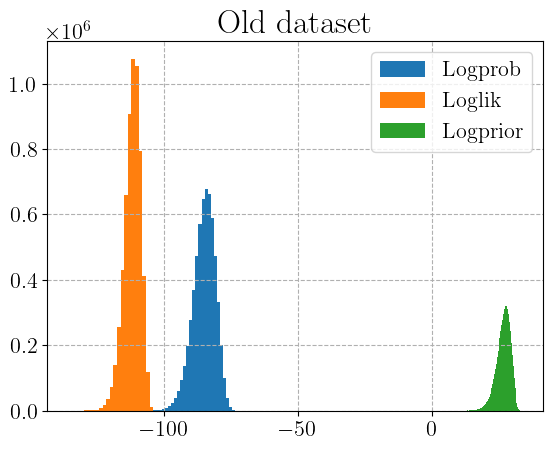

In [29]:
plt.style.use('code/matplotlib.mplstyle')
plt.hist(flavor_dataset_logprob_values_old,100,label="Logprob")
plt.hist(flavor_dataset_loglik_values_old,100,label="Loglik")
plt.hist(flavor_dataset_logprior_values_old,100,label="Logprior")
plt.legend()
plt.title("Old dataset")
plt.show()

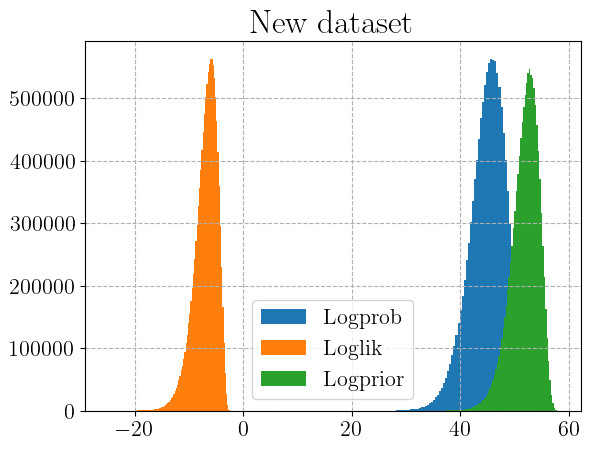

In [30]:
plt.style.use('code/matplotlib.mplstyle')
plt.hist(flavor_dataset_logprob_values_new,100,label="Logprob")
plt.hist(flavor_dataset_loglik_values_new,100,label="Loglik")
plt.hist(flavor_dataset_logprior_values_new,100,label="Logprior")
plt.legend()
plt.title("New dataset")
plt.show()

/tmp/ipykernel_35469/3470759907.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,8,i+1)


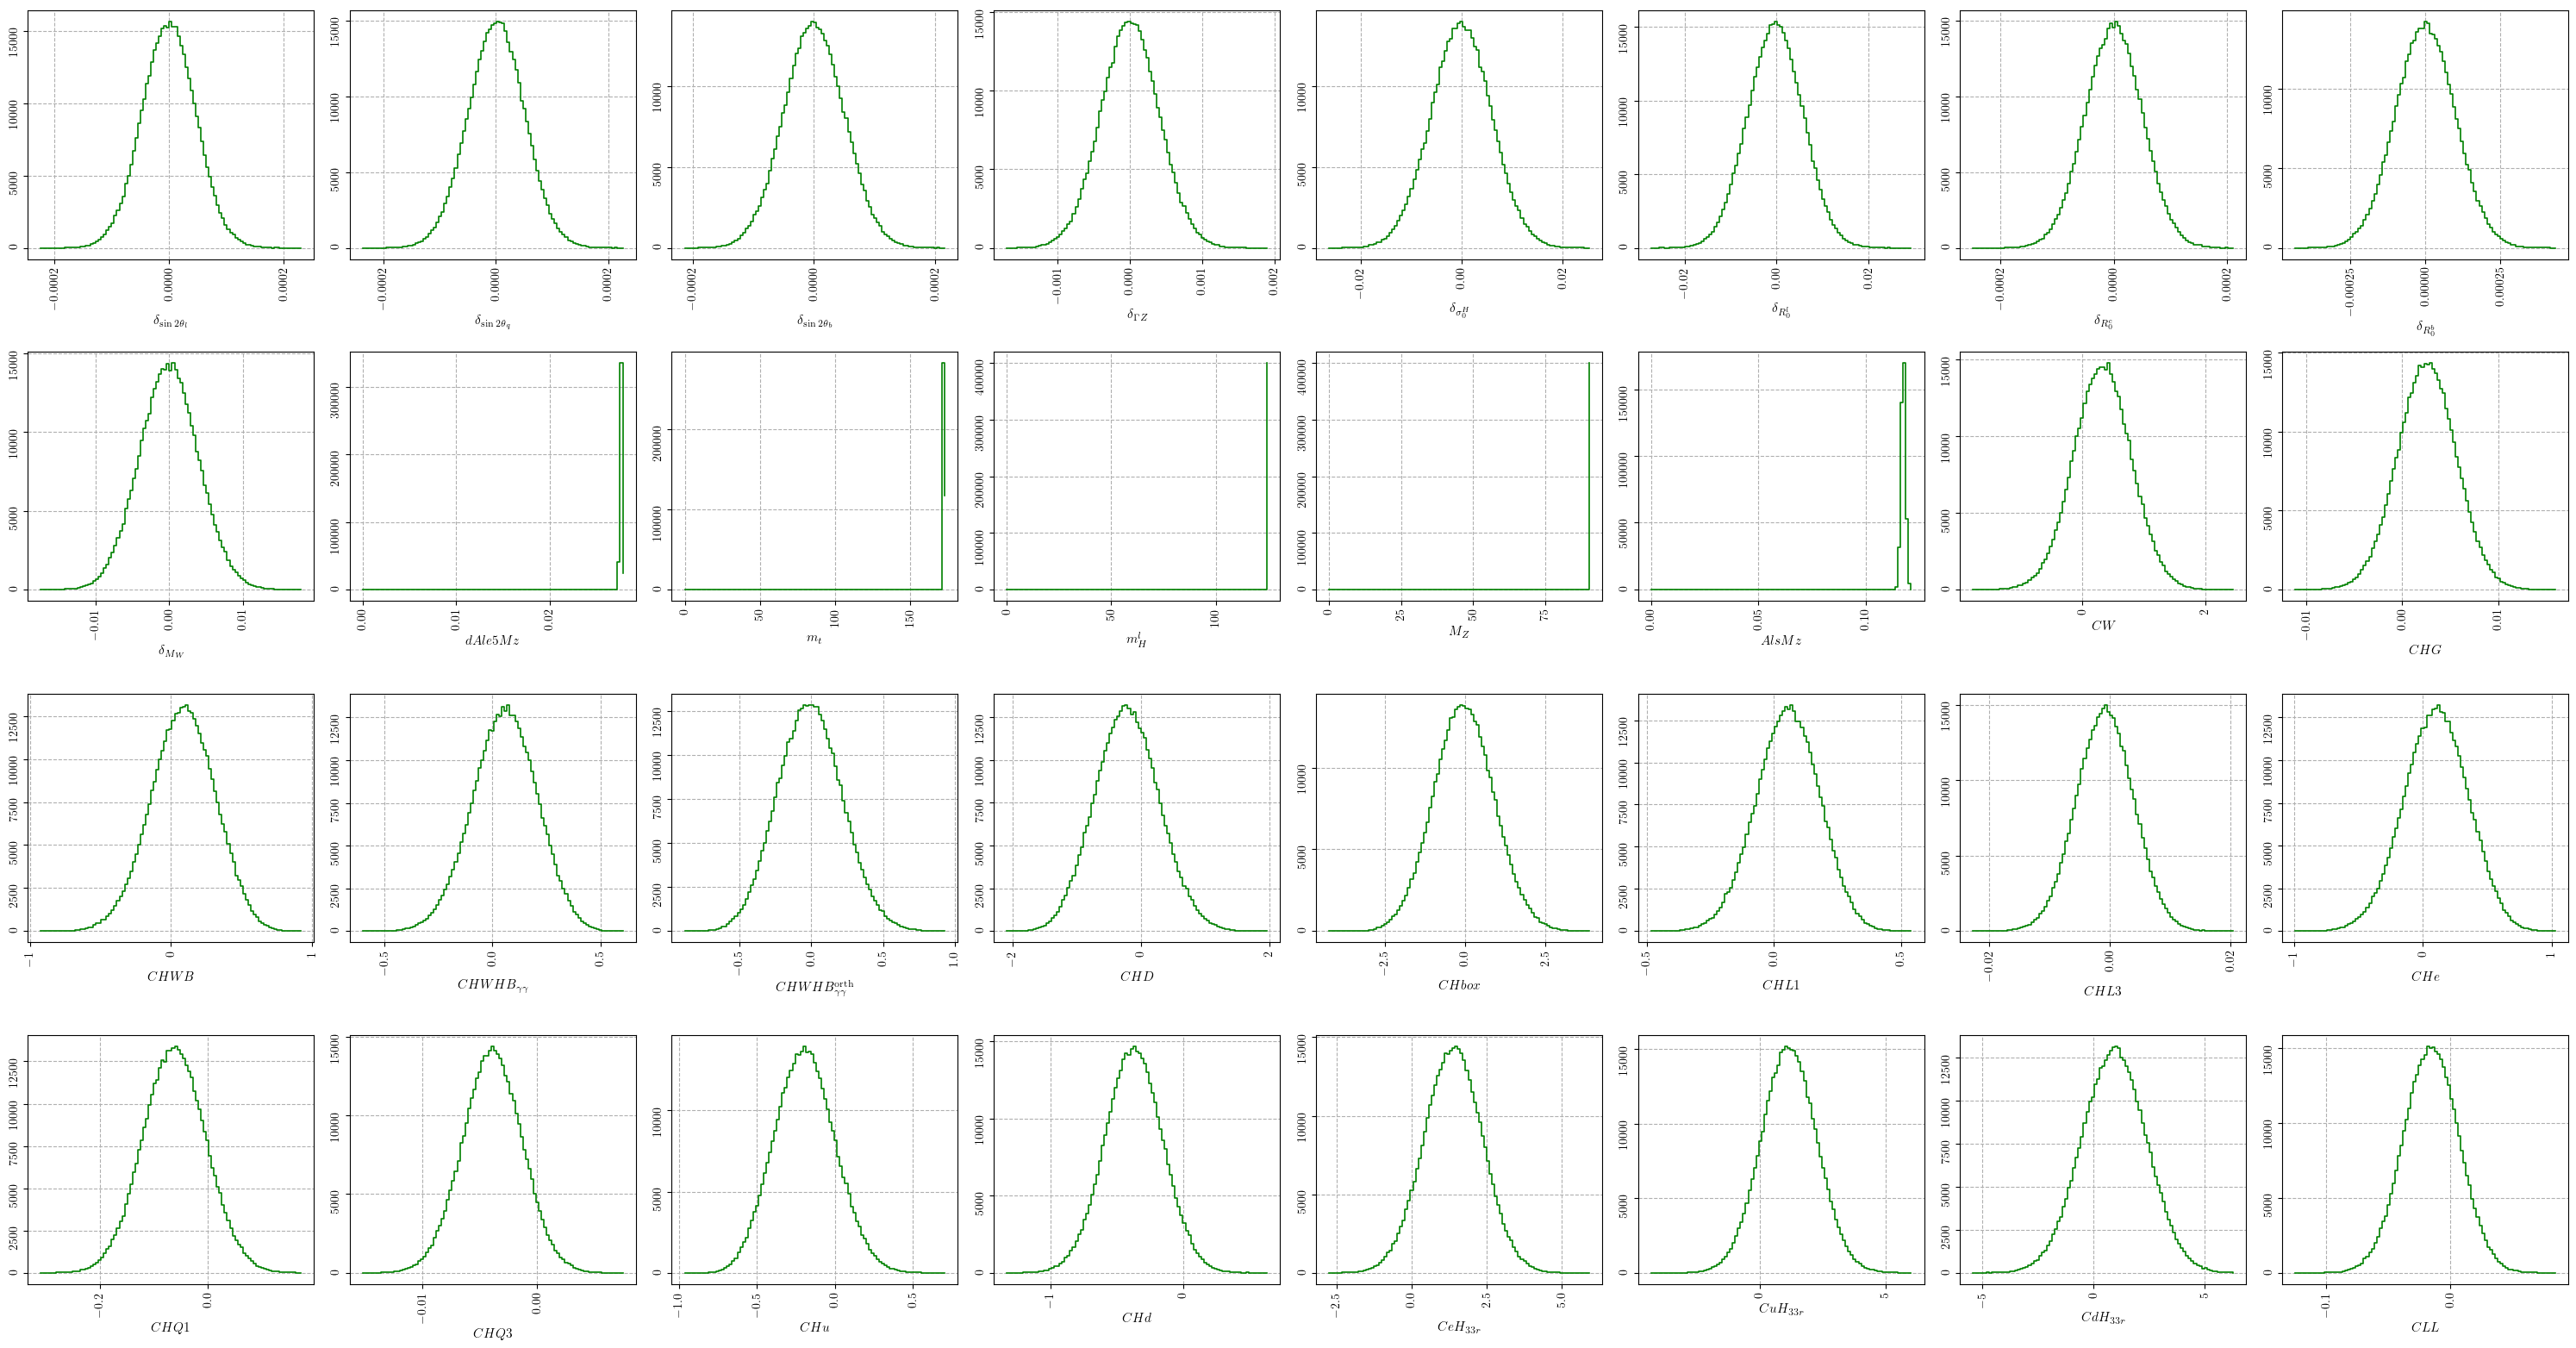

In [31]:
nnn = 400000
rnd_indices = np.random.choice(np.arange(len(flavor_dataset_samples_old)),size=nnn,replace=False)

plt.style.use('code/matplotlib.mplstyle')
plt.rcParams["figure.figsize"] = (30,27)
plt.grid(linestyle="--", dashes=(5,5))

for i in range(len(flavor_dataset_samples_old[1,:])):
    plt.subplot(7,8,i+1)
    counts, bins = np.histogram(flavor_dataset_samples_old[rnd_indices,i], 100)
    integral = 1#counts.sum()
    plt.step(bins[:-1], counts/integral, where='post',color = 'green')
    plt.xlabel(pars_labels_old[i],fontsize=11)
    #plt.ylabel(r"n",fontsize=11)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10, rotation=90)
    x1,x2,y1,y2 = plt.axis()
    #plt.axis([-380, -280, y1, y2])
    plt.tight_layout()
    #plt.legend(['Sample 1','Sample 2','Sample 3'])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.savefig(fig_dir + 'Flavorfit_old_pars_summary.pdf')
plt.show()

/tmp/ipykernel_35469/3583493271.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,8,i+1)


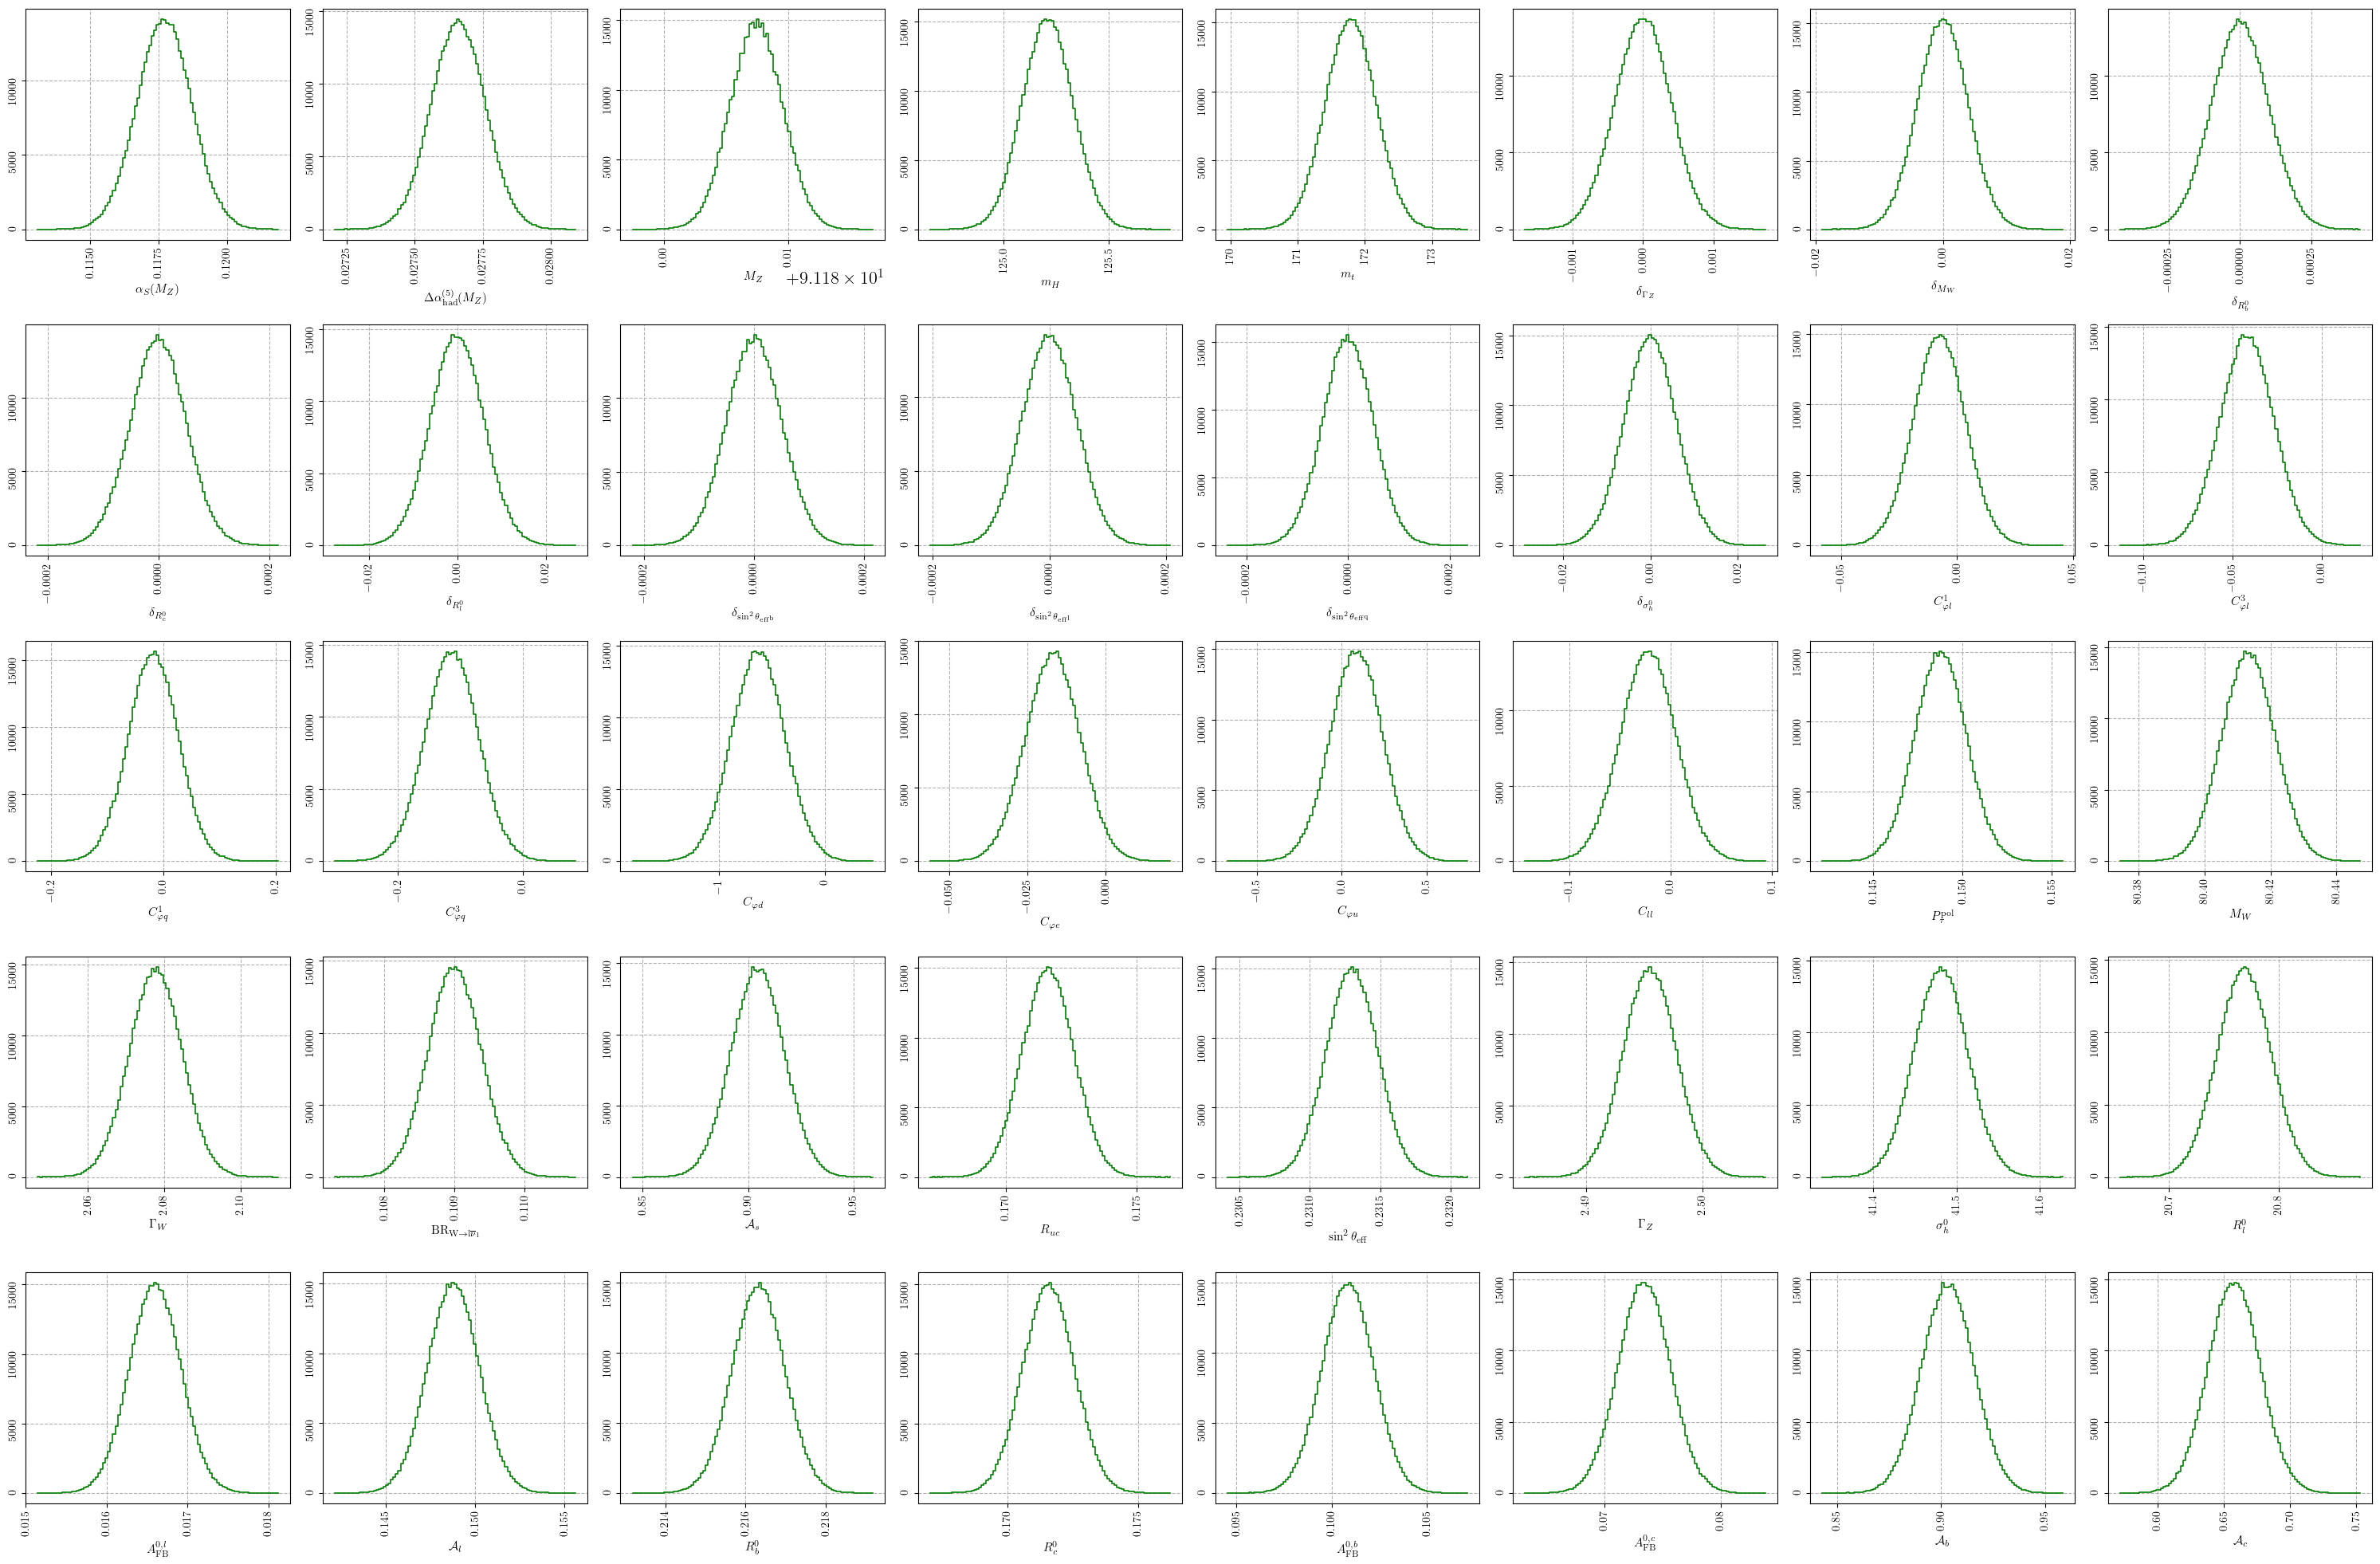

In [32]:
nnn = 400000
rnd_indices = np.random.choice(np.arange(len(flavor_dataset_samples_new)),size=nnn,replace=False)

plt.style.use('code/matplotlib.mplstyle')
plt.rcParams["figure.figsize"] = (30,27)
plt.grid(linestyle="--", dashes=(5,5))

for i in range(len(flavor_dataset_samples_new[1,:])):
    plt.subplot(7,8,i+1)
    counts, bins = np.histogram(flavor_dataset_samples_new[rnd_indices,i], 100)
    integral = 1#counts.sum()
    plt.step(bins[:-1], counts/integral, where='post',color = 'green')
    plt.xlabel(pars_labels_new[i],fontsize=11)
    #plt.ylabel(r"n",fontsize=11)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10, rotation=90)
    x1,x2,y1,y2 = plt.axis()
    #plt.axis([-380, -280, y1, y2])
    plt.tight_layout()
    #plt.legend(['Sample 1','Sample 2','Sample 3'])
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.savefig(fig_dir + 'Flavorfit_new_pars_summary.pdf')
plt.show()

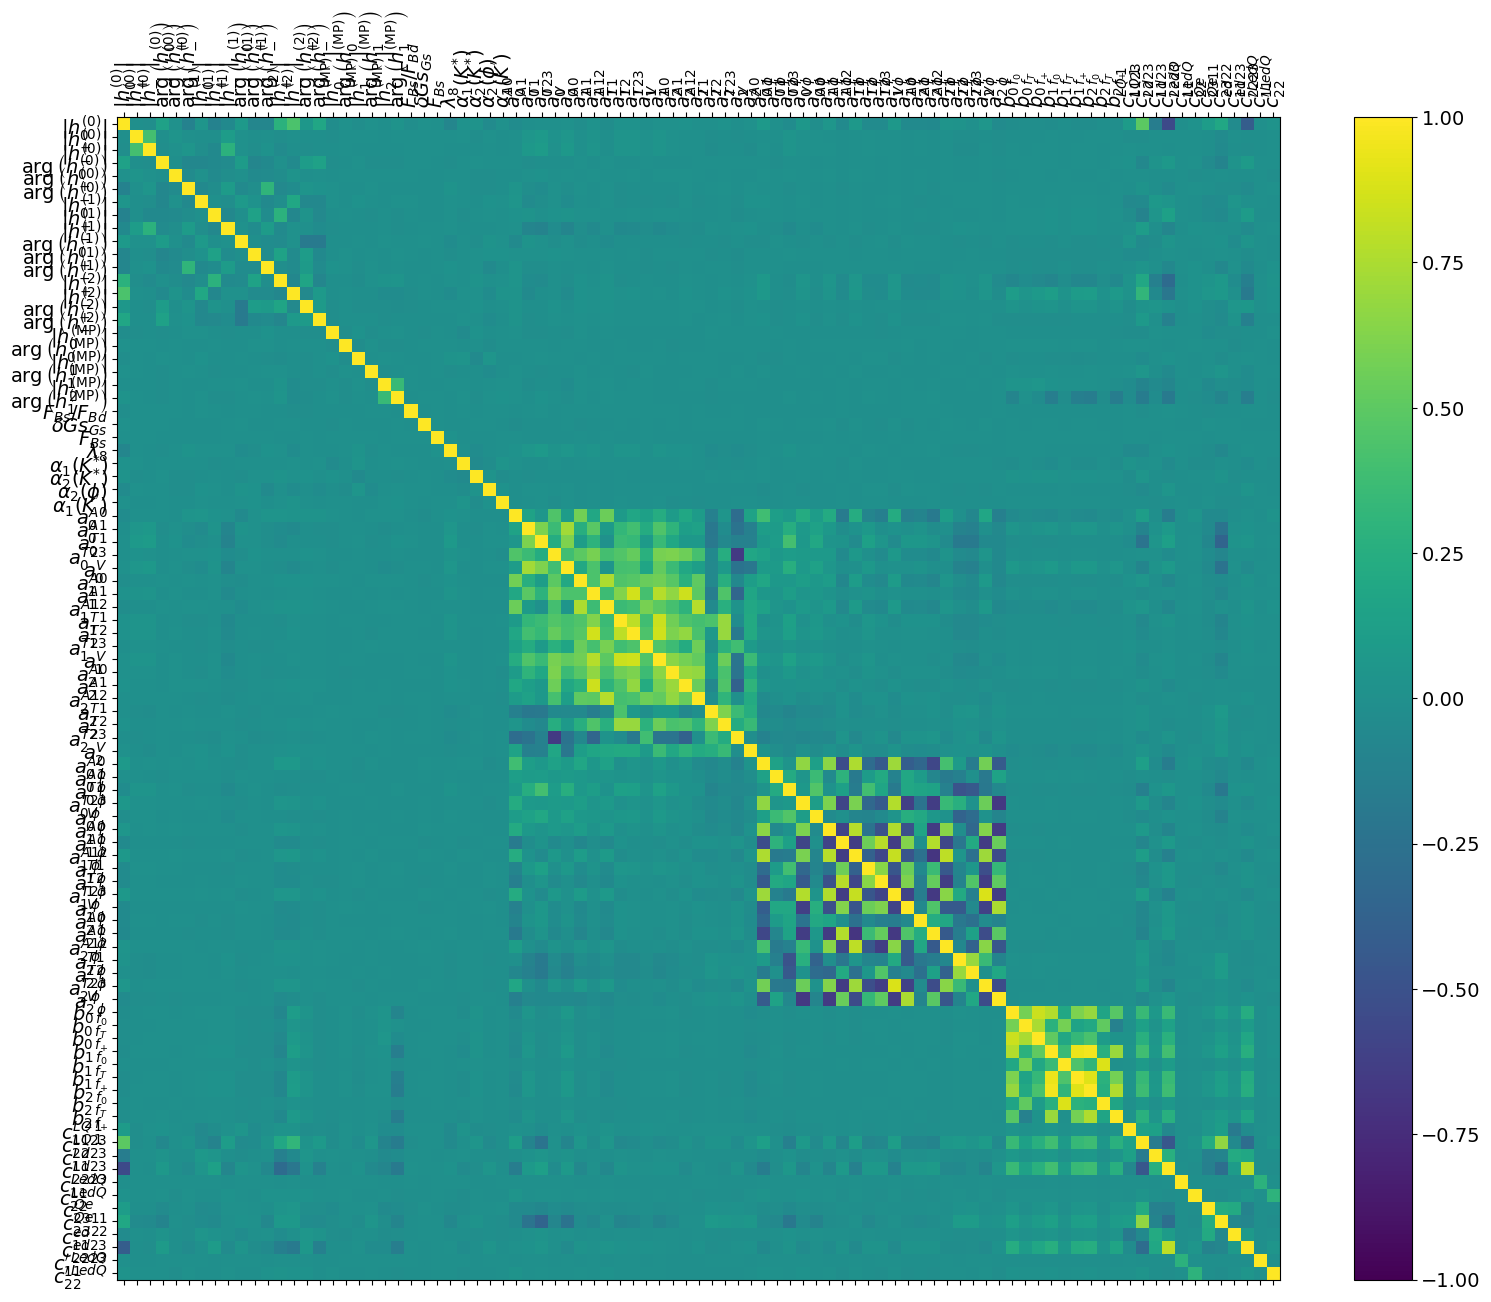

In [92]:
df = pd.DataFrame(flavor_dataset_samples_new[:300000])
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), pars_labels_new[:-2], fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), pars_labels_new[:-2], fontsize=14)
cb = plt.colorbar()
plt.clim(-1, 1)
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)
#plt.tight_layout()
plt.savefig(fig_dir + 'Flavorfit_correlation_matrix.pdf')
plt.show()

## Check data

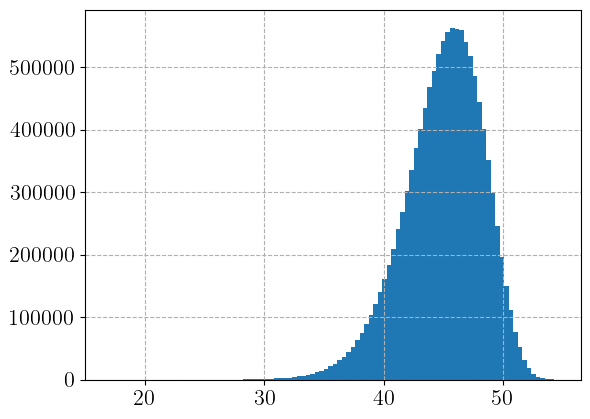

In [37]:
plt.style.use('code/matplotlib.mplstyle')
plt.hist(ew_dataset_logprob_values_new,100)
plt.show()

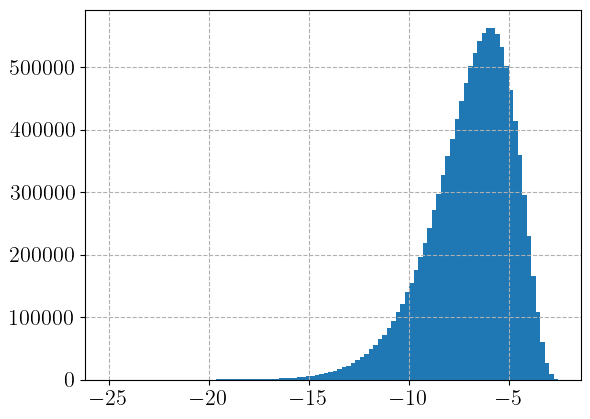

In [38]:
plt.style.use('code/matplotlib.mplstyle')
plt.hist(ew_dataset_loglik_values_new,100)
plt.show()

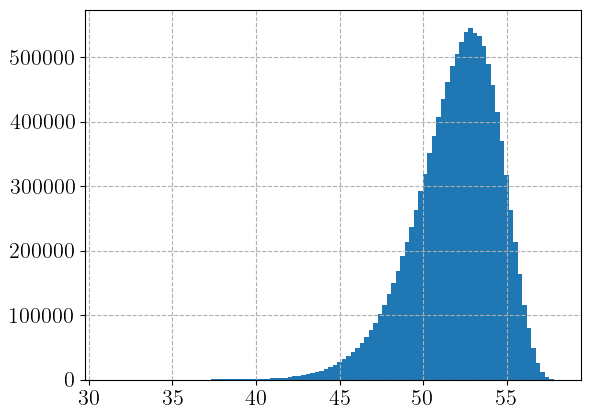

In [39]:
plt.style.use('code/matplotlib.mplstyle')
plt.hist(ew_dataset_logprior_values_new,100)
plt.show()

# NF Model

## Parameters initialization

In [8]:
### Define dataset ###
dataset = flavor_dataset_samples_new

### Define ndims from dataset ###
ndims: int = np.shape(dataset)[1]

### Initialize hyperparameters lists ###
nbijectors_list: List[int] = [2] #[5, 10]
hidden_layers_list: List[List[int]] = [[1024, 1024, 1024]] #[[128, 128, 128], [256, 256, 256]]
seeds_list: List[int] = [0]#, 187, 377, 440, 520, 541, 721, 869, 926, 933]

### Initialize nsamples inputs ###
nsamples_train: int = 1_000_000
nsamples_val: int = 300_000

### Initialize bijector inputs ###
bijector_name: str = 'MsplineN'
range_min: int = -5
spline_knots_list: List[Union[int,str]] = [8] #[8, 12] # Only relevant for the neural spline

### Initialize NN hyperparameters ###
activation: str = 'relu'
regulariser: Optional[str] = "l1"
eps_regulariser: float = 0.0001
use_batch_norm: bool = True

### Initialzie training hyperparameters ###
epochs_input: int = 12000
batch_size: int = 512
nan_threshold: float = 0.01
max_retry: int = 10
debug_print_mode: bool = True

### Initialize optimizer hyperparameters ###
lr_orig: float = 0.001

### Initialize callbacks hyperparameters ###
es_min_delta: float = .0001
es_patience: int = 80
lr_min_delta: float = .0001
lr_patience: int = 40
lr_reduce_factor: float = .5
lr_reduce_factor_on_nan: float = float(1/3)
min_lr: float = 1e-6

### Initialize old variables for backward compatibility
corr: Optional[str] = None

### Initialize dictionaries ###
results_dict: Dict[str, Any] = Utils.init_results_dict()
hyperparams_dict: Dict[str, Any] = Utils.init_hyperparams_dict()

### Initialize output dir ###
mother_output_dir: str = Utils.define_dir('results/Flavor_MsplineN/')

### Create 'log' file ####
log_file_name: str = Utils.create_log_file(mother_output_dir, results_dict)

## Train NF

In [9]:
run: int = 0
run_max: int = 1000
run_number: int = 0
n_runs: int = len(seeds_list) * len(nbijectors_list) * len(spline_knots_list) * len(hidden_layers_list)
start_global: float = timer()
base_dist: tfp.distributions.Distribution = Distributions.gaussians(ndims)
for seed_train in seeds_list:
    rnd_indices = np.random.choice(np.arange(len(dataset)),size=nsamples_train+nsamples_val,replace=False)
    rnd_indices_train = rnd_indices[:nsamples_train]
    rnd_indices_val = rnd_indices[nsamples_train:]
    means = np.mean(dataset[rnd_indices_train],axis=0)
    stds = np.std(dataset[rnd_indices_train],axis=0)
    X_data_train = preprocess_data(dataset[rnd_indices_train],means,stds)
    Y_data_train = np.zeros((len(rnd_indices_train),1))
    X_data_val = preprocess_data(dataset[rnd_indices_val],means,stds)
    Y_data_val = np.zeros((len(rnd_indices_val),1))
    for nbijectors in nbijectors_list:
        for spline_knots in spline_knots_list:
            for hidden_layers in hidden_layers_list:
                if run > run_max:
                    raise Exception("Interrupted after one run.")
                start_run: float = timer()
                hllabel: str = '-'.join(str(e) for e in hidden_layers)
                run_number = run_number + 1
                results_dict_txt_saved: bool = False
                results_dict_json_saved: bool = False
                results_log_saved: bool = False
                path_to_results: str
                to_run: bool
                path_to_results, to_run = Utils.define_run_dir(mother_output_dir+'run_'+str(run_number)+'/',
                                                               force = "continue", # delete, continue, or skip
                                                               bkp = False)
                if to_run:
                    try:
                        dummy_file_path: str = os.path.join(path_to_results,'running.txt')
                        with open(dummy_file_path, 'w') as f:
                            pass
                        path_to_weights: str = Utils.define_dir(os.path.join(path_to_results, 'weights'))
                        checkpoint_path: str = os.path.join(path_to_weights, 'best_weights.h5')
                        ########### Model train ###########
                        NFObject: Trainer.Trainer
                        hyperparams_dict, NFObject, results_dict, seed_train, training_time = train_function(X_data_train = X_data_train,
                            Y_data_train = Y_data_train,
                            X_data_val = X_data_val,
                            Y_data_val = Y_data_val,
                            seed_train = seed_train,
                            run_number = run_number,
                            base_dist = base_dist,
                            hyperparams_dict = hyperparams_dict,
                            n_runs = n_runs,
                            ndims = ndims,
                            bijector_name = bijector_name,
                            nbijectors = nbijectors,
                            spline_knots = spline_knots,
                            range_min = range_min,
                            hidden_layers = hidden_layers,
                            batch_size = batch_size,
                            epochs_input = epochs_input,
                            lr_orig = lr_orig,
                            es_min_delta = es_min_delta,
                            es_patience = es_patience,
                            lr_reduce_factor = lr_reduce_factor,
                            lr_reduce_factor_on_nan = lr_reduce_factor_on_nan,
                            lr_min_delta = lr_min_delta,
                            lr_patience = lr_patience,
                            min_lr = min_lr,
                            activation = activation,
                            regulariser = regulariser,
                            eps_regulariser = eps_regulariser,
                            use_batch_norm = use_batch_norm,
                            training_device = training_devices[0],
                            path_to_results = path_to_results,
                            checkpoint_path = checkpoint_path,
                            max_retry = max_retry,
                            debug_print_mode = debug_print_mode,
                            nan_threshold = nan_threshold,
                            results_dict = results_dict,
                            train = True)
                        print(f"Model trained in {training_time:.2f} s.\n") # type: ignore
                        ############ Save results ###########
                        Utils.save_results_current_run_json(path_to_results, results_dict)
                        results_dict_json_saved = True
                        print("results.json saved")
                        Utils.save_results_log(log_file_name, results_dict)
                        results_log_saved = True
                        print("Results log saved")
                        end_run: float = timer()
                        total_time_run=end_run-start_run
                        print(textwrap.dedent(f"""\
                            ===========
                            Run {run_number}/{n_runs} done in {total_time_run:.2f} s.
                            ===========
                            """))
                        run = run + 1
                        try:
                            os.remove(dummy_file_path)
                        except:
                            pass
                        dummy_file_path = os.path.join(path_to_results,'done.txt')
                        with open(dummy_file_path, 'w') as f:
                            pass
                    except Exception as ex:
                        try:
                            os.remove(dummy_file_path)
                        except:
                            pass
                        # Get current system exception
                        ex_type, ex_value, ex_traceback = sys.exc_info()
                        # Extract unformatter stack traces as tuples
                        trace_back = traceback.extract_tb(ex_traceback) # type: ignore
                        # Format stacktrace
                        stack_trace = list()
                        for trace in trace_back:
                            stack_trace.append("File : %s , Line : %d, Func.Name : %s, Message : %s" % (trace[0], trace[1], trace[2], trace[3]))
                        if not results_dict_txt_saved:
                            results_dict = Utils.update_results_dict(results_dict = results_dict,
                                                                     hyperparams_dict = hyperparams_dict)
                            Utils.save_results_current_run_txt(path_to_results, results_dict)
                        if not results_dict_json_saved:
                            Utils.save_results_current_run_json(path_to_results, results_dict)
                        if not results_log_saved:
                            Utils.save_results_log(log_file_name, results_dict)
                        ex_type_str = f"Exception type: {ex_type.__name__}" # type: ignore
                        print(textwrap.dedent(f"""\
                            ===========
                            Run {run_number}/{n_runs} failed.
                            {ex_type_str}
                            Exception message: {ex_value}
                            Stack trace: {stack_trace}
                            ===========
                            """))
                else:
                    print(textwrap.dedent(f"""\
                        ===========
                        Run {run_number}/{n_runs} already exists. Skipping it.
                        ===========
                        """))
#keys_to_remove = ['ks_lists', 'ad_lists', 'fn_list', 'wd_lists', 'swd_lists', 'train_loss_history', 'val_loss_history', 'lr_history']
#dict_copy: Dict[str, Any] = {k: v for k, v in results_dict.items() if k not in keys_to_remove}
#results_frame: pd.DataFrame = pd.DataFrame(dict_copy)
#results_last_run_file: str = os.path.join(mother_output_dir,'results_last_run.txt')
#results_frame.to_csv(results_last_run_file,index=False)
end_global: float = timer()
print(f"Everything done in {end_global-start_global:.2f} s.\n")

Building Trainer NFObject.


--------------- Debug info ---------------
Initializing Trainer with following parameters:
base_distribution: tfp.distributions.Sample("SampleNormal", batch_shape=[], event_shape=[89], dtype=float32)
flow: tfp.bijectors._Chain("chain_of_MAFspline_of_permute_of_MAFspline", batch_shape=[], min_event_ndims=1, bijectors=[MaskedAutoregressiveFlow, Permute, MaskedAutoregressiveFlow])
x_data_train shape: (1000000, 89)
y_data_train shape: (1000000, 1)
io_kwargs: {'results_path': 'results/Flavor_MsplineN/run_1/', 'load_weights': True, 'load_results': True}
data_kwargs: {'seed': 0}
compiler_kwargs: {'optimizer': {'class_name': 'Custom>Adam', 'config': {'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': True}}, 'metrics': [{'class_name': 'MinusLogProbMetric', 'config': {'ignore_nans': True, 'debug_print_mode': False}}], 'loss': {'class_name': 'MinusLogProbLoss', 'config': {'name': 'MLP', 'ignore_nans': True, 'nan_threshold': 0.01, 'de

## Load NF

In [9]:
run: int = 0
run_max: int = 1000
run_number: int = 0
n_runs: int = len(seeds_list) * len(nbijectors_list) * len(spline_knots_list) * len(hidden_layers_list)
start_global: float = timer()
base_dist: tfp.distributions.Distribution = Distributions.gaussians(ndims)
for seed_train in seeds_list:
    rnd_indices = np.random.choice(np.arange(len(dataset)),size=nsamples_train+nsamples_val,replace=False)
    rnd_indices_train = rnd_indices[:nsamples_train]
    rnd_indices_val = rnd_indices[nsamples_train:]
    means = np.mean(dataset[rnd_indices_train],axis=0)
    stds = np.std(dataset[rnd_indices_train],axis=0)
    X_data_train = preprocess_data(dataset[rnd_indices_train],means,stds)
    Y_data_train = np.zeros((len(rnd_indices_train),1))
    X_data_val = preprocess_data(dataset[rnd_indices_val],means,stds)
    Y_data_val = np.zeros((len(rnd_indices_val),1))
    for nbijectors in nbijectors_list:
        for spline_knots in spline_knots_list:
            for hidden_layers in hidden_layers_list:
                if run > run_max:
                    raise Exception("Interrupted after one run.")
                start_run: float = timer()
                hllabel: str = '-'.join(str(e) for e in hidden_layers)
                run_number = run_number + 1
                results_dict_txt_saved: bool = False
                results_dict_json_saved: bool = False
                results_log_saved: bool = False
                path_to_results: str
                to_run: bool
                path_to_results, to_run = Utils.define_run_dir(mother_output_dir+'run_'+str(run_number)+'/',
                                                               force = "continue", # delete, continue, or skip
                                                               bkp = False)
                if to_run:
                    try:
                        dummy_file_path: str = os.path.join(path_to_results,'running.txt')
                        with open(dummy_file_path, 'w') as f:
                            pass
                        path_to_weights: str = Utils.define_dir(os.path.join(path_to_results, 'weights'))
                        checkpoint_path: str = os.path.join(path_to_weights, 'best_weights.h5')
                        ########### Model train ###########
                        NFObject: Trainer.Trainer
                        hyperparams_dict, NFObject, results_dict, seed_train, training_time = train_function(X_data_train = X_data_train,
                            Y_data_train = Y_data_train,
                            X_data_val = X_data_val,
                            Y_data_val = Y_data_val,
                            seed_train = seed_train,
                            run_number = run_number,
                            base_dist = base_dist,
                            hyperparams_dict = hyperparams_dict,
                            n_runs = n_runs,
                            ndims = ndims,
                            bijector_name = bijector_name,
                            nbijectors = nbijectors,
                            spline_knots = spline_knots,
                            range_min = range_min,
                            hidden_layers = hidden_layers,
                            batch_size = batch_size,
                            epochs_input = epochs_input,
                            lr_orig = lr_orig,
                            es_min_delta = es_min_delta,
                            es_patience = es_patience,
                            lr_reduce_factor = lr_reduce_factor,
                            lr_reduce_factor_on_nan = lr_reduce_factor_on_nan,
                            lr_min_delta = lr_min_delta,
                            lr_patience = lr_patience,
                            min_lr = min_lr,
                            activation = activation,
                            regulariser = regulariser,
                            eps_regulariser = eps_regulariser,
                            use_batch_norm = use_batch_norm,
                            training_device = training_devices[0],
                            path_to_results = path_to_results,
                            checkpoint_path = checkpoint_path,
                            max_retry = max_retry,
                            debug_print_mode = debug_print_mode,
                            nan_threshold = nan_threshold,
                            results_dict = results_dict,
                            train = False)
                        print(f"Model trained in {training_time:.2f} s.\n") # type: ignore
                        ############ Save results ###########
                        Utils.save_results_current_run_json(path_to_results, results_dict)
                        results_dict_json_saved = True
                        print("results.json saved")
                        Utils.save_results_log(log_file_name, results_dict)
                        results_log_saved = True
                        print("Results log saved")
                        end_run: float = timer()
                        total_time_run=end_run-start_run
                        print(textwrap.dedent(f"""\
                            ===========
                            Run {run_number}/{n_runs} done in {total_time_run:.2f} s.
                            ===========
                            """))
                        run = run + 1
                        try:
                            os.remove(dummy_file_path)
                        except:
                            pass
                        dummy_file_path = os.path.join(path_to_results,'done.txt')
                        with open(dummy_file_path, 'w') as f:
                            pass
                    except Exception as ex:
                        try:
                            os.remove(dummy_file_path)
                        except:
                            pass
                        # Get current system exception
                        ex_type, ex_value, ex_traceback = sys.exc_info()
                        # Extract unformatter stack traces as tuples
                        trace_back = traceback.extract_tb(ex_traceback) # type: ignore
                        # Format stacktrace
                        stack_trace = list()
                        for trace in trace_back:
                            stack_trace.append("File : %s , Line : %d, Func.Name : %s, Message : %s" % (trace[0], trace[1], trace[2], trace[3]))
                        if not results_dict_txt_saved:
                            results_dict = Utils.update_results_dict(results_dict = results_dict,
                                                                     hyperparams_dict = hyperparams_dict)
                            Utils.save_results_current_run_txt(path_to_results, results_dict)
                        if not results_dict_json_saved:
                            Utils.save_results_current_run_json(path_to_results, results_dict)
                        if not results_log_saved:
                            Utils.save_results_log(log_file_name, results_dict)
                        ex_type_str = f"Exception type: {ex_type.__name__}" # type: ignore
                        print(textwrap.dedent(f"""\
                            ===========
                            Run {run_number}/{n_runs} failed.
                            {ex_type_str}
                            Exception message: {ex_value}
                            Stack trace: {stack_trace}
                            ===========
                            """))
                else:
                    print(textwrap.dedent(f"""\
                        ===========
                        Run {run_number}/{n_runs} already exists. Skipping it.
                        ===========
                        """))
#keys_to_remove = ['ks_lists', 'ad_lists', 'fn_list', 'wd_lists', 'swd_lists', 'train_loss_history', 'val_loss_history', 'lr_history']
#dict_copy: Dict[str, Any] = {k: v for k, v in results_dict.items() if k not in keys_to_remove}
#results_frame: pd.DataFrame = pd.DataFrame(dict_copy)
#results_last_run_file: str = os.path.join(mother_output_dir,'results_last_run.txt')
#results_frame.to_csv(results_last_run_file,index=False)
end_global: float = timer()
print(f"Everything done in {end_global-start_global:.2f} s.\n")

Directory results/Flavor_MsplineN/run_1/ already exists.
Continuing it. Ensure that you have properly set the loading parameters load_weights and load_history.
Building Trainer NFObject.


--------------- Debug info ---------------
Initializing Trainer with following parameters:
base_distribution: tfp.distributions.Sample("SampleNormal", batch_shape=[], event_shape=[89], dtype=float32)
flow: tfp.bijectors._Chain("chain_of_MAFspline_of_permute_of_MAFspline", batch_shape=[], min_event_ndims=1, bijectors=[MaskedAutoregressiveFlow, Permute, MaskedAutoregressiveFlow])
x_data_train shape: (1000000, 89)
y_data_train shape: (1000000, 1)
io_kwargs: {'results_path': 'results/Flavor_MsplineN/run_1/', 'load_weights': True, 'load_results': True}
data_kwargs: {'seed': 0}
compiler_kwargs: {'optimizer': {'class_name': 'Custom>Adam', 'config': {'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': True}}, 'metrics': [{'class_name': 'MinusLogProbMetric', 'config': {'ignore

## Plot results

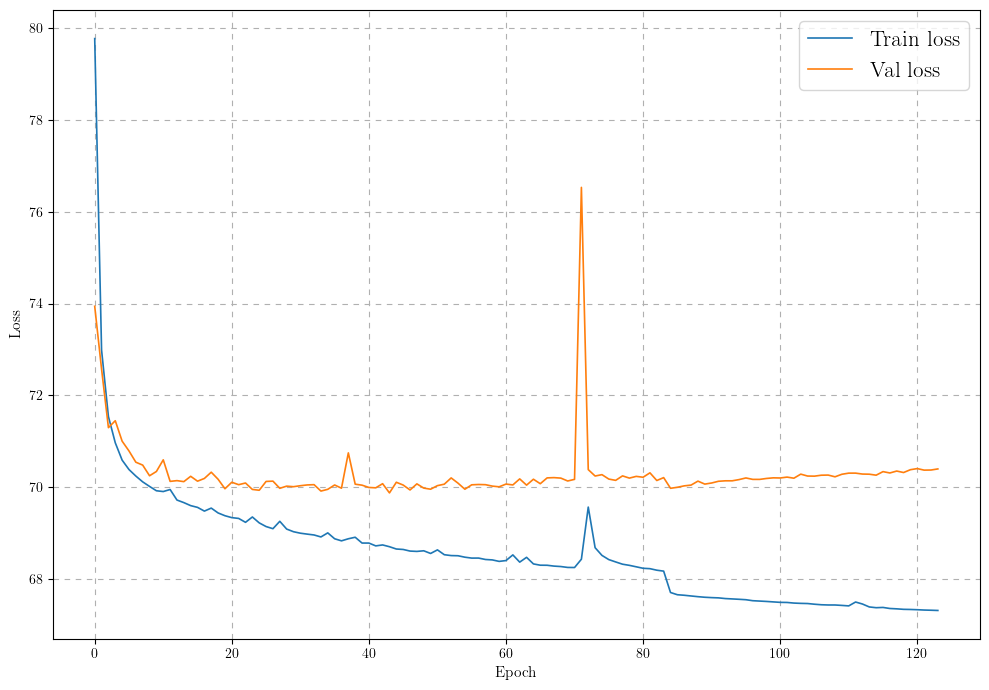

In [34]:
# Plot loss history
plt.style.use('NFTF2/v1/matplotlib.mplstyle')
plt.rcParams["figure.figsize"] = (10,7)
plt.grid(linestyle="--", dashes=(5,5))
plt.plot(NFObject.history['loss'],label='Train loss')
plt.plot(NFObject.history['val_loss'],label='Val loss')
plt.xlabel('Epoch',fontsize=11)
plt.ylabel('Loss',fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig(path_to_results + 'loss_history.pdf')
plt.show()

In [10]:
print("i=0")
X_data_NF = postprocess_data(NFObject.nf_dist.sample(10_000).numpy(),means,stds)
for i in range(1,10):
    print(f"i={i}")
    X_data_NF = np.concatenate((X_data_NF,postprocess_data(NFObject.nf_dist.sample(10_000).numpy(),means,stds)),axis=0)
rnd_indices_test = np.random.choice(np.arange(len(dataset)),size=100_000,replace=False)
X_data_test = dataset[rnd_indices_test]

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9


In [11]:
pars_labels_new[-14:-2]

['$c^{LQ\\,1}_{1123}$',
 '$c^{LQ\\,1}_{2223}$',
 '$c^{Ld}_{1123}$',
 '$c^{Ld}_{2223}$',
 '$c^{LedQ}_{11}$',
 '$c^{LedQ}_{22}$',
 '$c^{Qe}_{2311}$',
 '$c^{Qe}_{2322}$',
 '$c^{ed}_{1123}$',
 '$c^{ed}_{2223}$',
 '$c^{\\prime\\,LedQ}_{11}$',
 '$c^{\\prime\\,LedQ}_{22}$']

In [12]:
X_data_NF = X_data_NF.reshape(100000,89)

Sampling from dist_1...
Sampling from dist_2...
Computing HPD intervals...
HPD intervals computed in 0.9400828657671809 s.
Computing HPD quotas...
HPD quotas computed in 3.309716052375734 s.
Plotting corner plot...


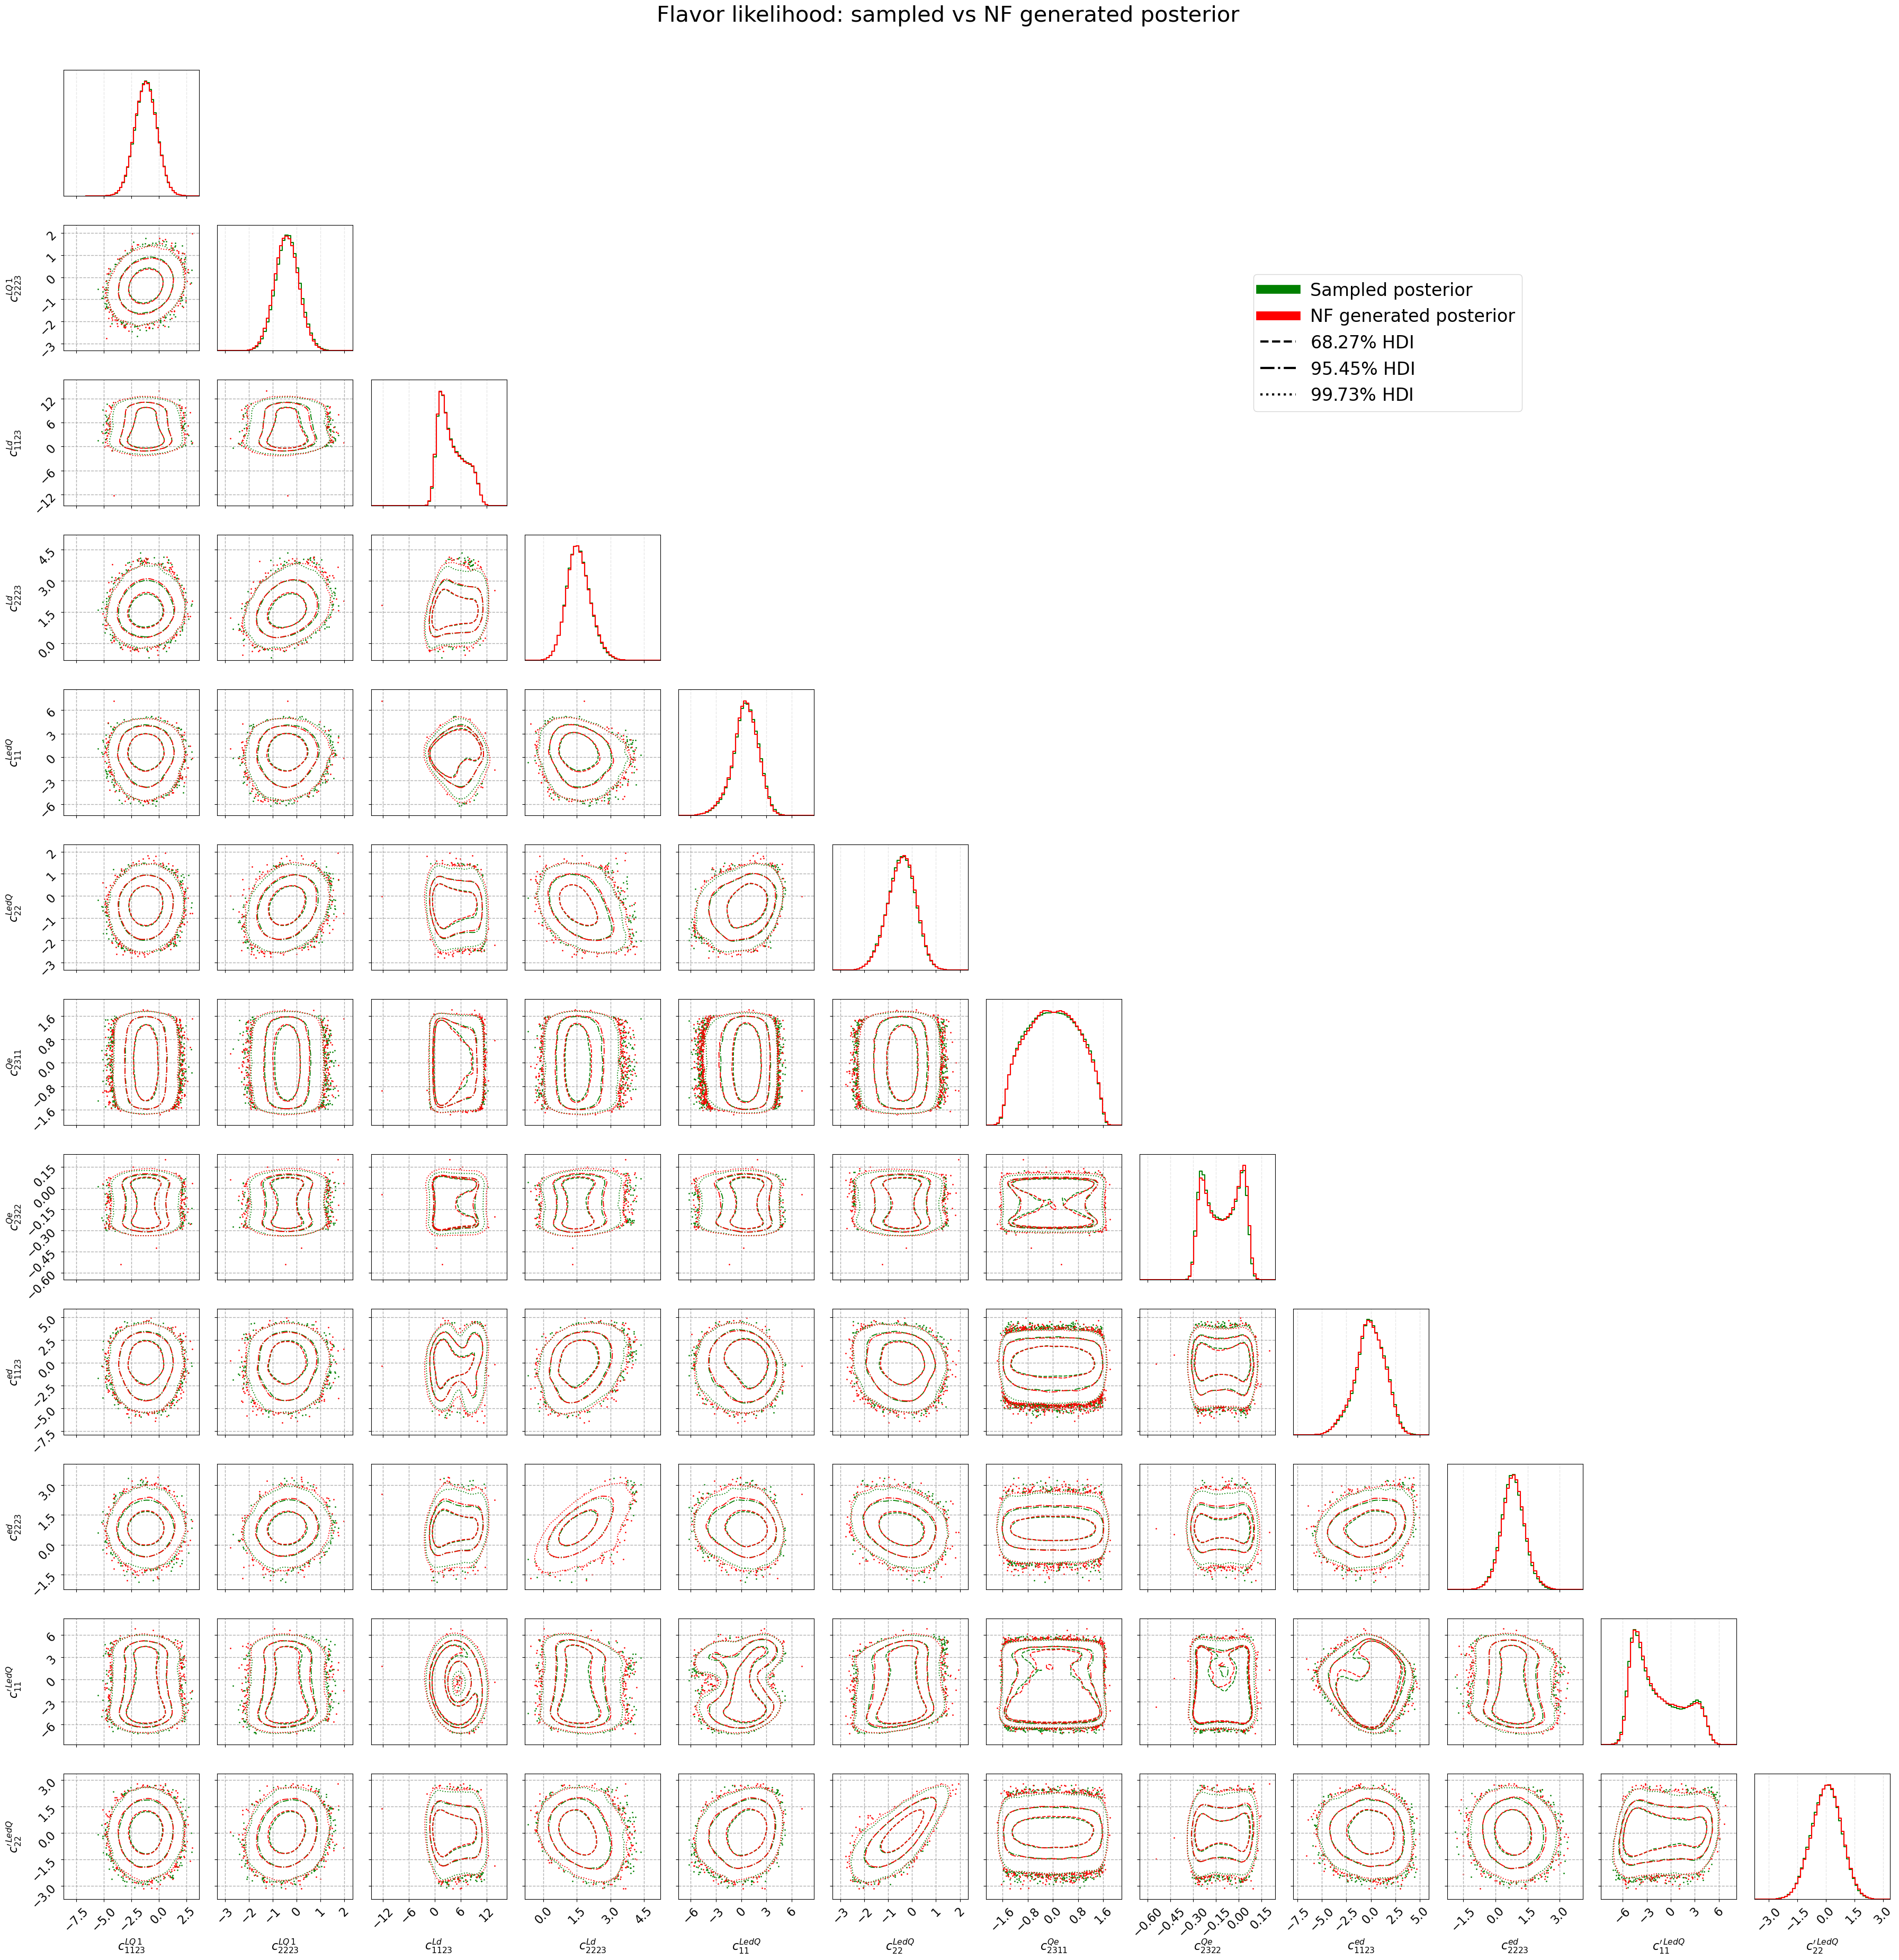

Plot done and saved in 25.419977633282542 s.


In [13]:
plot_corners(X_data_test[:,-14:-2],
             X_data_NF[:,-14:-2],
             max_points = 1_000_000,
             max_dim = 20,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             labels = pars_labels_new[-14:-2],
             color1 = "green",
             color2 = "red",
             plot_title = "Flavor likelihood: sampled vs NF generated posterior",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Sampled posterior",
                              r"NF generated posterior",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = path_to_results,
             figname = "corner_plot_def_1.png",
             save = True,
             show = True)

# TwoSample Test (Full Posterior)

In [14]:
tests_dir: str = Utils.define_dir(os.path.join(path_to_results, 'tests'))

## Simple Null hypothesis

In [15]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float32)
dist_2_null = tf.cast(dstmp[l:], tf.float32)
del(dstmp)
print(f"Available {len(dist_1_null)} samples for dist_1 and {len(dist_2_null)} samples for dist_2.")

Available 1200000 samples for dist_1 and 1200000 samples for dist_2.


In [14]:
TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null,
                                                       dist_2_input = dist_2_null,
                                                       niter = 120,
                                                       batch_size_test = 10_000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float32,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
print("nsamples",TwoSampleTestInputsNull.nsamples)
print("batch_size",TwoSampleTestInputsNull.batch_size_test)
print("niter",TwoSampleTestInputsNull.niter)
print("niter * batch_size",TwoSampleTestInputsNull.niter*TwoSampleTestInputsNull.batch_size_test)
print("small_sample",TwoSampleTestInputsNull.small_sample)

Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
dtype of dist_input: <dtype: 'float32'>
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
dtype of dist_input: <dtype: 'float32'>
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
nsamples 1200000
batch_size 10000
niter 120
niter * batch_size 1200000
small_sample False


In [32]:
KSTest = GMetrics.KSTest(TwoSampleTestInputsNull,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputsNull,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 10_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputsNull,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [34]:
KSTest.Test_tf(max_vectorize = 20_000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 120
batch_size = 10000
KS tests calculation completed in 6.819039126858115 seconds.


{'statistic_lists': array([[0.02      , 0.0187    , 0.0201    , ..., 0.01109999, 0.00980002,
         0.00940001],
        [0.0081    , 0.01140001, 0.009     , ..., 0.00759999, 0.00890005,
         0.01310003],
        [0.0095    , 0.0113    , 0.01509997, ..., 0.0187    , 0.01050001,
         0.0121    ],
        ...,
        [0.0147    , 0.00999999, 0.0099    , ..., 0.0108    , 0.01429999,
         0.00999999],
        [0.01089996, 0.00830001, 0.01010001, ..., 0.0082    , 0.01490003,
         0.01190001],
        [0.01159999, 0.01790005, 0.01200002, ..., 0.00850001, 0.00959998,
         0.01590002]], dtype=float32),
 'statistic_means': array([0.01275169, 0.01273484, 0.0122191 , 0.01221124, 0.01226854,
        0.0124708 , 0.01171461, 0.01374719, 0.01219102, 0.0118281 ,
        0.01252472, 0.01268764, 0.01204383, 0.0121472 , 0.01394719,
        0.01255619, 0.0121281 , 0.01139102, 0.01222809, 0.01262585,
        0.01249776, 0.01295057, 0.01184382, 0.01214832, 0.01215956,
        0.012683

In [35]:
nsamples = KSTest.Inputs.batch_size_test
ns = nsamples**2 /(2*nsamples)
scale_func = lambda ns, _ : np.sqrt(ns)
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"]) * scale_func(ns, ndims)
cl_list = [0.68, 0.95]

metric_thresholds = [[cl, 
                      [int(cl*len(dist_null)), 
                       int((1-cl)*len(dist_null))], 
                      np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
metric_thresholds

[[0.68, [81, 38], 0.88205683], [0.95, [114, 6], 0.9326662]]

## 10K

### Bootstrapping Null Hypothesis

In [16]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '10K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '10K', "metrics_config.json")

In [17]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [18]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 120, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 10, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 12_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [19]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 120

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000


FGD metric calculation completed in 116.65779818873852 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 98.79740952979773 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 94.50690469425172 seconds.

Testing from 360 to 480 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 94.15935408882797 seconds.

Testing from 480 to 600 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation 

In [20]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 0.004245452111738629], [0.95, [912, 48], 0.016549108098580845], [0.99, [950, 9], 0.02198562865948822]]
Computing time for metric fgd: 780.7757459841669
ThresholdS for metric mmd: [[0.68, [652, 307], 0.0034325345894217207], [0.95, [912, 48], 0.017853702901305724], [0.99, [950, 9], 0.028524948759155677]]
Computing time for metric mmd: 275.1645279955119
ThresholdS for metric ks: [[0.68, [652, 307], 0.8838838233659545], [0.95, [912, 48], 0.9463317225760768], [0.99, [950, 9], 0.9796213072811356]]
Computing time for metric ks: 67.13499982561916
ThresholdS for metric sks: [[0.68, [652, 307], 0.8908842129006357], [0.95, [912, 48], 0.9632210465632355], [0.99, [950, 9], 1.0160421771495707]]
Computing time for metric sks: 138.2403705501929
ThresholdS for metric swd: [[0.68, [652, 307], 0.13465882850286276], [0.95, [912, 48], 0.15046081373652706], [0.99, [950, 9], 0.16285798209612012]]
Computing time for metric swd: 83.24388152267784


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f3d8dfa7910>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f3d8dfa79a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f3d8dfa4040>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f3d8dfa7b50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f3d8dfa7880>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1             10  $d_{\mathrm{MMD}}$   
2          12000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  
0  [[0.68, [652, 307], 0.004245452111738629], [0....  
1  [[0.68, [652, 307], 0.0034325345894217207], [0...  
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...  
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...  
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...

#### Plots of null-distributions

mu = 0.0037789142825719094 +/- 1.0204448459134922e-06
sigma = 0.005622928698780485 +/- 0.0002122349256815346
68%CL = 0.004245452111738629, 95%CL = 0.016549108098580845, 99%CL = 0.02198562865948822
mu = 0.0037789142825719094 +/- 1.0204448459134922e-06
sigma = 0.005622928698780485 +/- 0.0002122349256815346


/tmp/ipykernel_30800/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_30800/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_30800/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


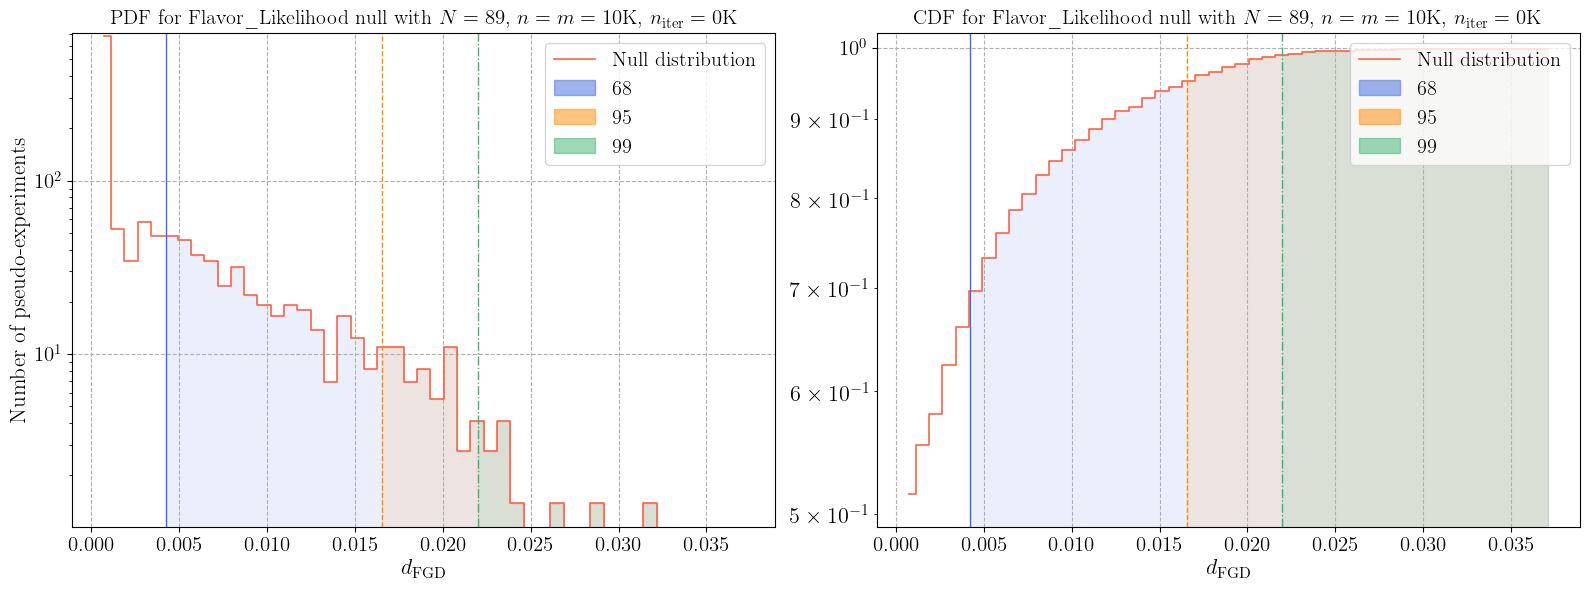

Time elapsed: 12.28055248502642 seconds.
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246
68%CL = 0.0034325345894217207, 95%CL = 0.017853702901305724, 99%CL = 0.028524948759155677
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246


/tmp/ipykernel_30800/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_30800/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_30800/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_30800/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


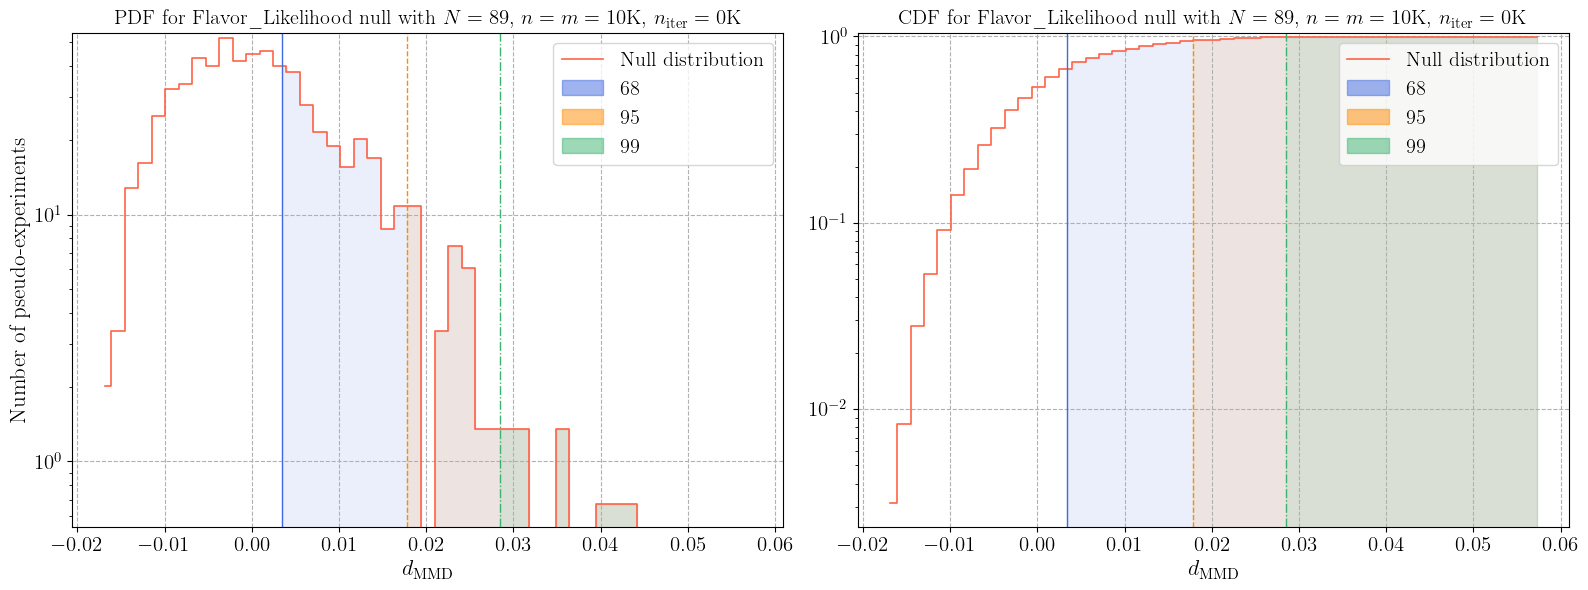

Time elapsed: 7.8055781200528145 seconds.
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855
68%CL = 0.8838838233659545, 95%CL = 0.9463317225760768, 99%CL = 0.9796213072811356
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855


/tmp/ipykernel_30800/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_30800/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_30800/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_30800/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


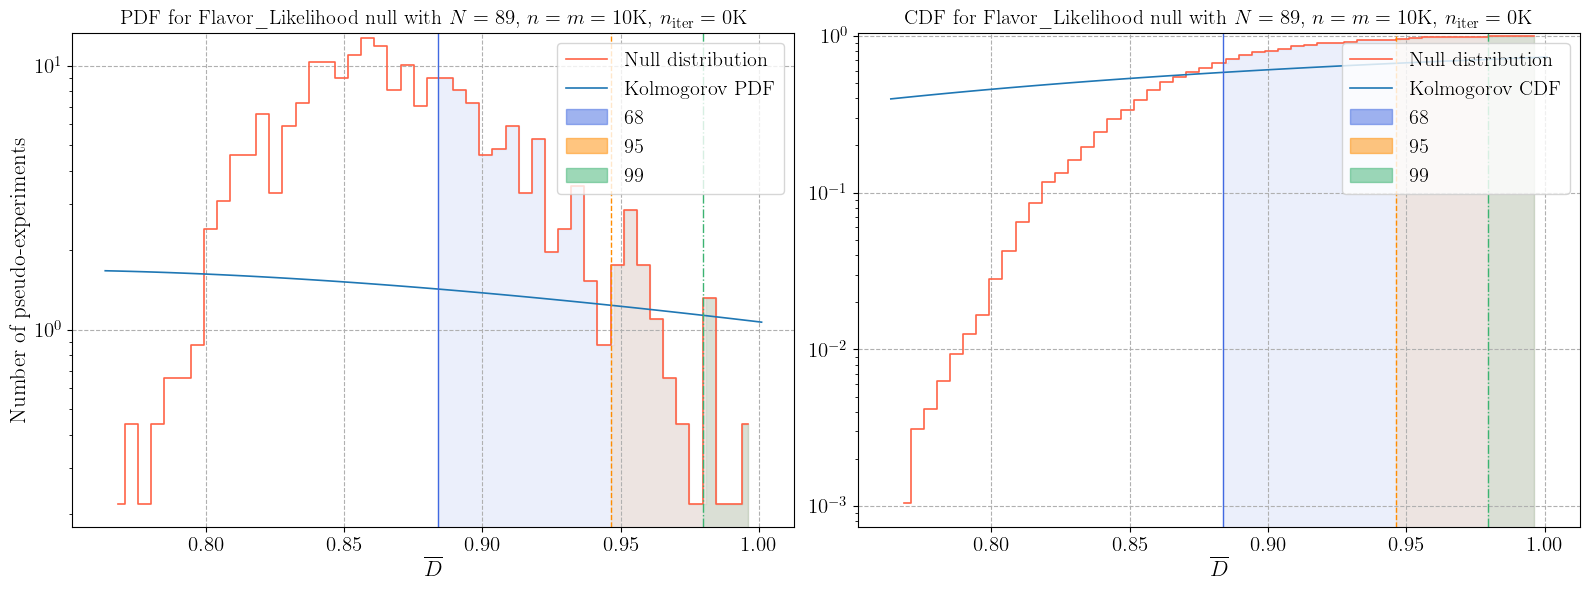

Time elapsed: 7.555815587751567 seconds.
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607
68%CL = 0.8908842129006357, 95%CL = 0.9632210465632355, 99%CL = 1.0160421771495707
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607


/tmp/ipykernel_30800/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_30800/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_30800/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_30800/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


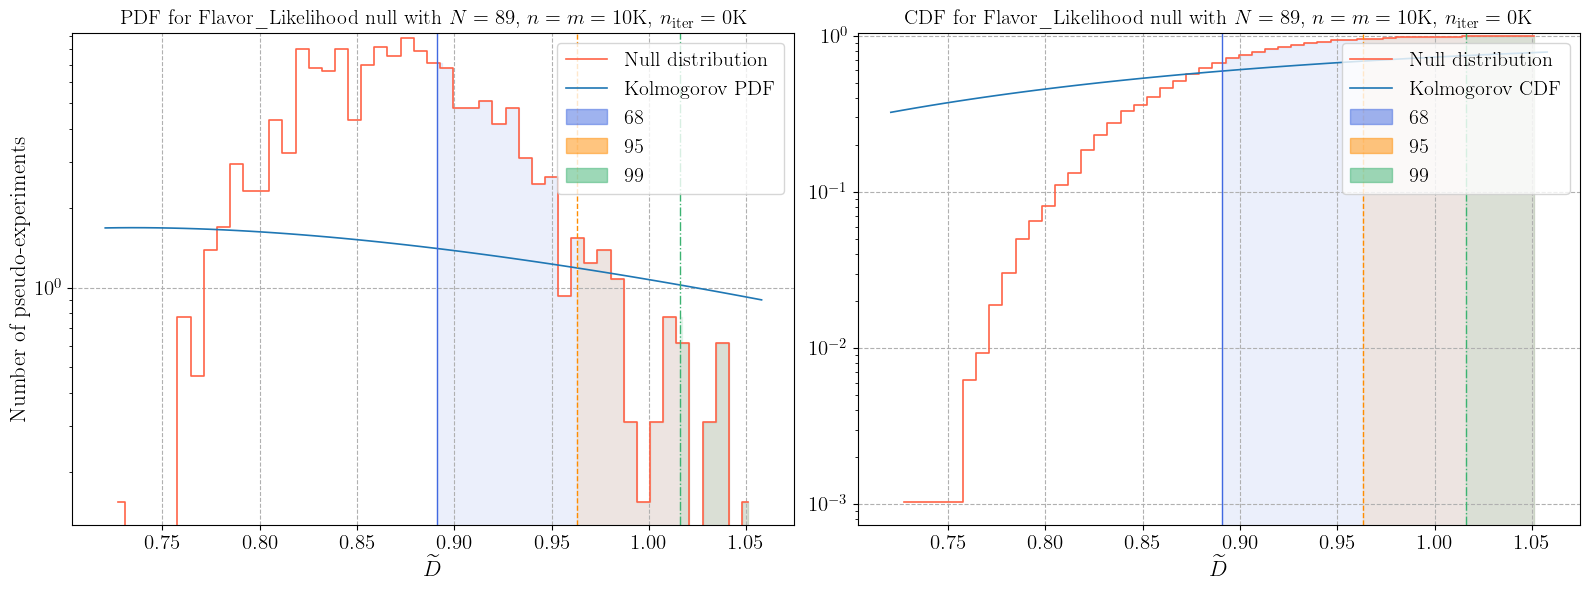

Time elapsed: 4.8444593250751495 seconds.
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595
68%CL = 0.13465882850286276, 95%CL = 0.15046081373652706, 99%CL = 0.16285798209612012
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595


/tmp/ipykernel_30800/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_30800/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_30800/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_30800/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


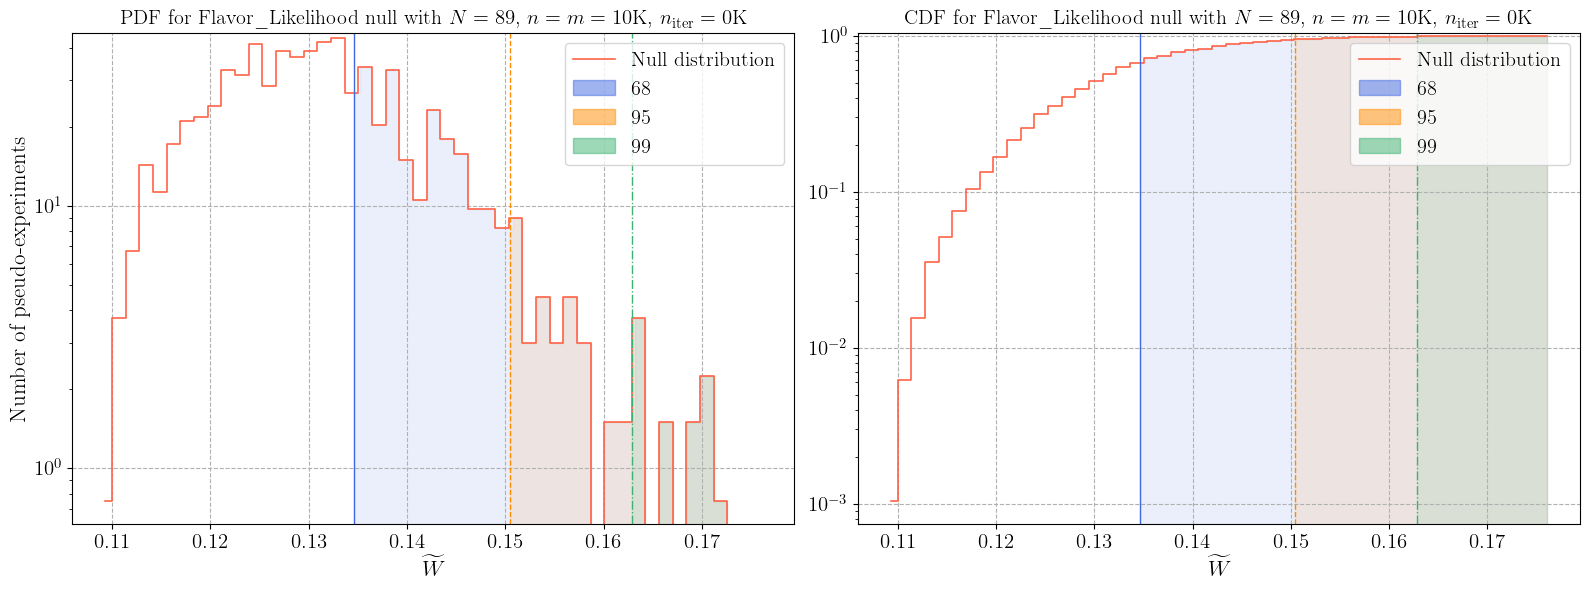

Time elapsed: 5.126787414774299 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f3d8dfa7910>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f3d8dfa79a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f3d8dfa4040>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f3d8dfa7b50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f3d8dfa7880>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1             10  $d_{\mathrm{MMD}}$   
2          12000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  \
0  [[0.68, [652, 307], 0.004245452111738629], [0....   
1  [[0.68, [652, 307], 0.0034325345894217207], [0...   
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...   
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...   
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...   

                                         null_figure  
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...

In [21]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [22]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1200000 samples for dist_1_alt.


In [23]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(10_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(10_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [24]:
TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter*batch_size_test],
                                                      niter = niter,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [25]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120


batch_size = 10000
FGD metric calculation completed in 86.6853113239631 seconds.
Thresholds for metric fgd: [[0.68, [652, 307], 0.004245452111738629], [0.95, [912, 48], 0.016549108098580845], [0.99, [950, 9], 0.02198562865948822]]
Value of the test-statistic for the alternative hypothesis: 0.05855328665049669

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 120
batch_size = 10000
nchunks = 12
Iterating from 0 to 10 out of 120 .
Iterating from 10 to 20 out of 120 .
Iterating from 20 to 30 out of 120 .
Iterating from 30 to 40 out of 120 .
Iterating from 40 to 50 out of 120 .
Iterating from 50 to 60 out of 120 .
Iterating from 60 to 70 out of 120 .
Iterating from 70 to 80 out of 120 .
Iterating from 80 to 90 out of 120 .
Iterating from 90 to 100 out of 120 .
Iterating from 100 to 110 out of 120 .
Iterating from 110 to 120 out of 120 .
MMD metric calculation completed in 35.28989686165005 seconds.
Thresholds for metric mmd

# TwoSample Test (POI Posterior)

In [14]:
tests_dir: str = Utils.define_dir(os.path.join(path_to_results, 'tests_poi'))

## 10K

### Bootstrapping Null Hypothesis

In [15]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '10K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '10K', "metrics_config.json")

In [20]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)[:, -14:-2]
dist_2_null = tf.cast(dstmp[l:], tf.float64)[:, -14:-2]
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8


Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [21]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 120, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 10, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 12_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [22]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)[:, -14:-2]
            dist_2_null = tf.cast(dstmp[l:], tf.float64)[:, -14:-2]
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 120

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000


FGD metric calculation completed in 17.446443020366132 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 17.49738081265241 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 16.520504233427346 seconds.

Testing from 360 to 480 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 16.31721089873463 seconds.

Testing from 480 to 600 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation

In [23]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 0.0013765071468396436], [0.95, [912, 48], 0.009548281646451589], [0.99, [950, 9], 0.015565131483906817]]
Computing time for metric fgd: 135.23279427736998
ThresholdS for metric mmd: [[0.68, [652, 307], 0.050930650556438195], [0.95, [912, 48], 0.5549859778853943], [0.99, [950, 9], 1.0098341511877607]]
Computing time for metric mmd: 181.09792178403586
ThresholdS for metric ks: [[0.68, [652, 307], 0.8974367088035801], [0.95, [912, 48], 1.0135195346058083], [0.99, [950, 9], 1.0712670829959772]]
Computing time for metric ks: 21.55302880331874
ThresholdS for metric sks: [[0.68, [652, 307], 0.9048142731690926], [0.95, [912, 48], 1.0512562642071275], [0.99, [950, 9], 1.1431800554617557]]
Computing time for metric sks: 128.19030279759318
ThresholdS for metric swd: [[0.68, [652, 307], 0.18961432108350815], [0.95, [912, 48], 0.24032048714675955], [0.99, [950, 9], 0.27627431275378167]]
Computing time for metric swd: 90.1544332858175


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f382c598d30>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f2d80662950>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f2d80662050>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f2d80661fc0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f2d80661f30>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1             10  $d_{\mathrm{MMD}}$   
2          12000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
1  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
2  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
3  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
4  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   

                                          thresholds  
0  [[0.68, [652, 307], 0.0013765071468396436], [0...  
1  [[0.68, [652, 307], 0.050930650556438195], [0....  
2  [[0.68, [652, 307], 0.8974367088035801], [0.95...  
3  [[0.68, [652, 307], 0.9048142731690926], [0.95...  
4  [[0.68, [652, 307], 0.18961432108350815], [0.9...

#### Plots of null-distributions

mu = 0.0019230057874507628 +/- 4.020555221147814e-07
sigma = 0.003529480801932518 +/- 0.00018912752754406646
68%CL = 0.0013765071468396436, 95%CL = 0.009548281646451589, 99%CL = 0.015565131483906817
mu = 0.0019230057874507628 +/- 4.020555221147814e-07
sigma = 0.003529480801932518 +/- 0.00018912752754406646


/tmp/ipykernel_62917/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_62917/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_62917/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


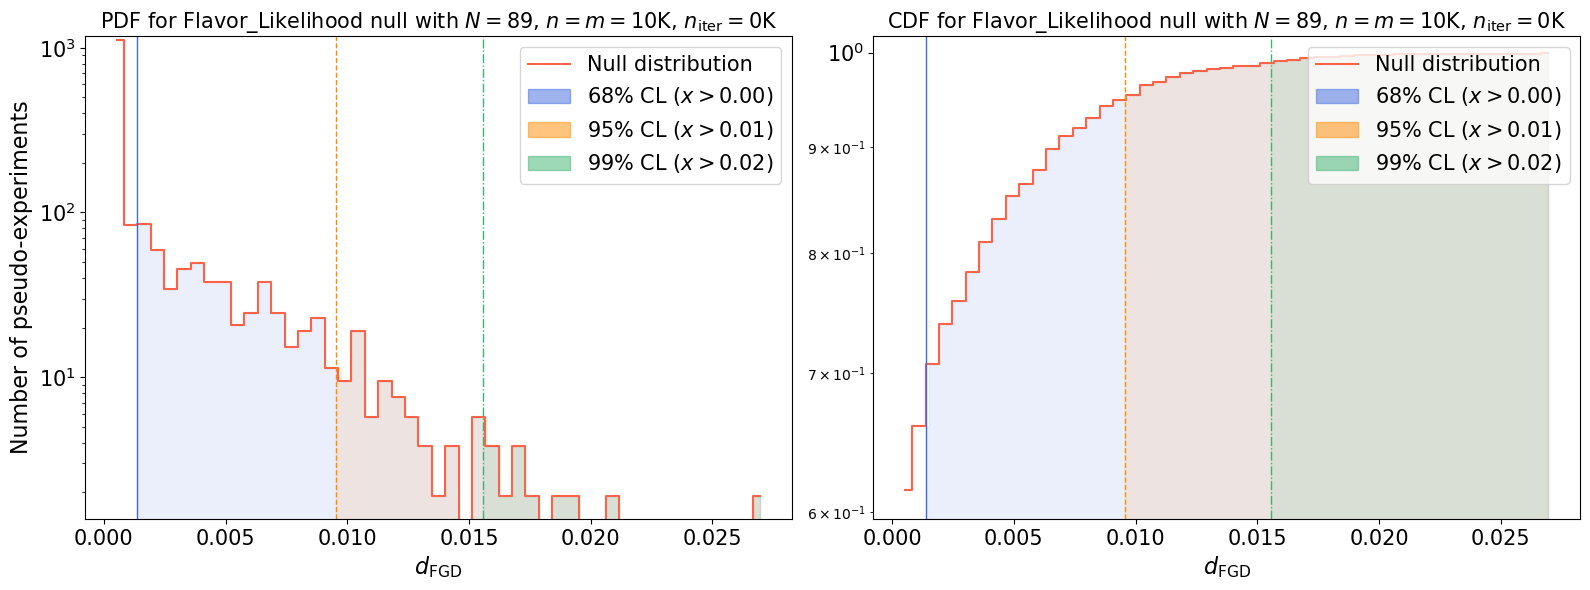

Time elapsed: 1.381550382822752 seconds.
mu = 0.023635806947103433 +/- 0.002460545027289582
sigma = 0.2761108460497128 +/- 0.016608612528186958
68%CL = 0.050930650556438195, 95%CL = 0.5549859778853943, 99%CL = 1.0098341511877607
mu = 0.023635806947103433 +/- 0.002460545027289582
sigma = 0.2761108460497128 +/- 0.016608612528186958


/tmp/ipykernel_62917/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_62917/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_62917/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_62917/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


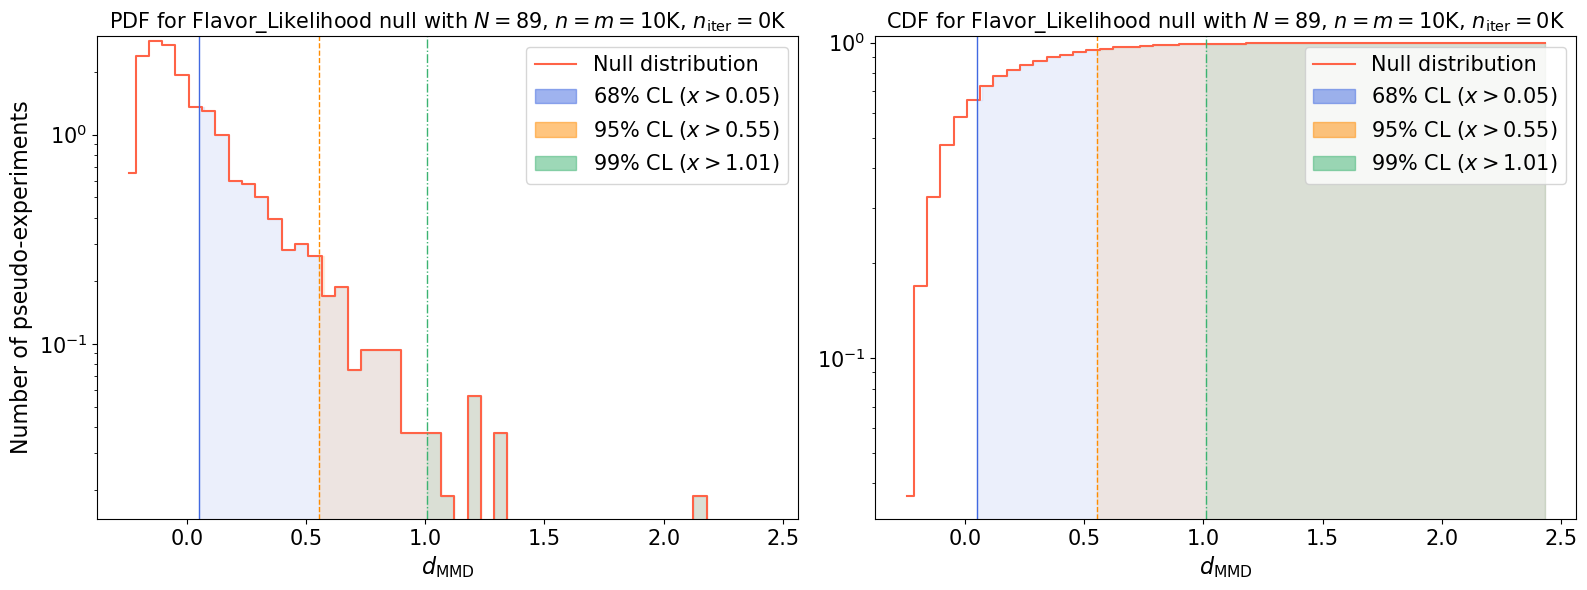

Time elapsed: 1.2363531570881605 seconds.
mu = 0.8677676799649687 +/- 0.0002108547254708083
sigma = 0.08082756164663524 +/- 0.0018514280773321312
68%CL = 0.8974367088035801, 95%CL = 1.0135195346058083, 99%CL = 1.0712670829959772
mu = 0.8677676799649687 +/- 0.0002108547254708083
sigma = 0.08082756164663524 +/- 0.0018514280773321312


/tmp/ipykernel_62917/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_62917/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_62917/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_62917/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


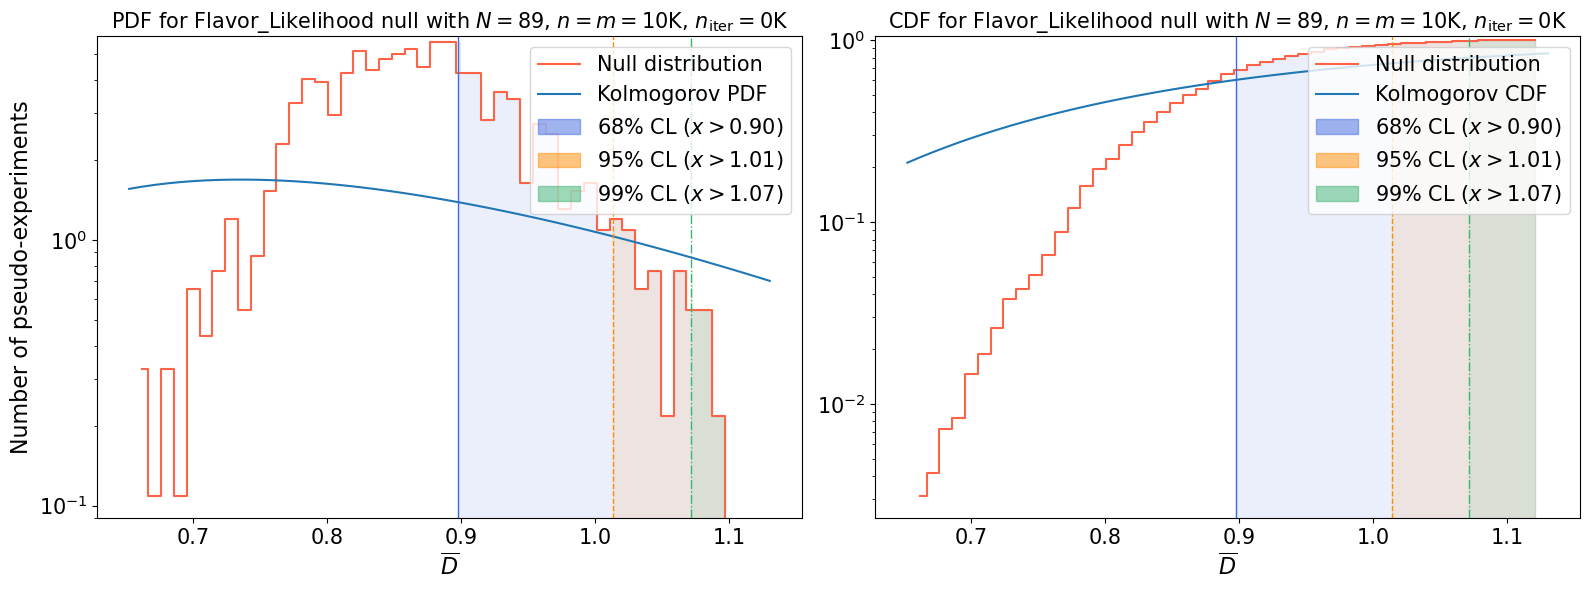

Time elapsed: 1.6906936056911945 seconds.
mu = 0.8707055032657565 +/- 0.0003137765256131864
sigma = 0.09860025387921457 +/- 0.00237976977537062
68%CL = 0.9048142731690926, 95%CL = 1.0512562642071275, 99%CL = 1.1431800554617557
mu = 0.8707055032657565 +/- 0.0003137765256131864
sigma = 0.09860025387921457 +/- 0.00237976977537062


/tmp/ipykernel_62917/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_62917/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_62917/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_62917/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


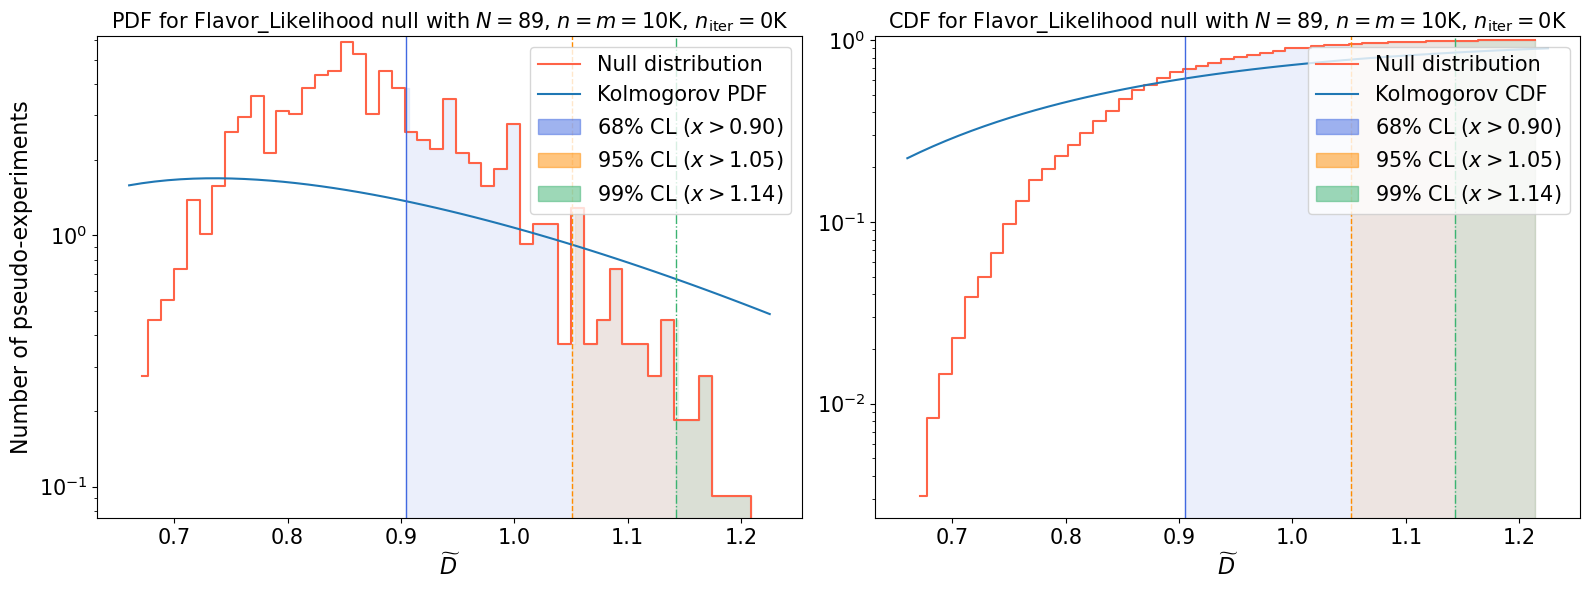

Time elapsed: 1.5638622306287289 seconds.
mu = 0.1803785350081361 +/- 3.2625536058599074e-05
sigma = 0.03179410735542595 +/- 0.0008530802358387014
68%CL = 0.18961432108350815, 95%CL = 0.24032048714675955, 99%CL = 0.27627431275378167
mu = 0.1803785350081361 +/- 3.2625536058599074e-05
sigma = 0.03179410735542595 +/- 0.0008530802358387014


/tmp/ipykernel_62917/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_62917/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_62917/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_62917/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


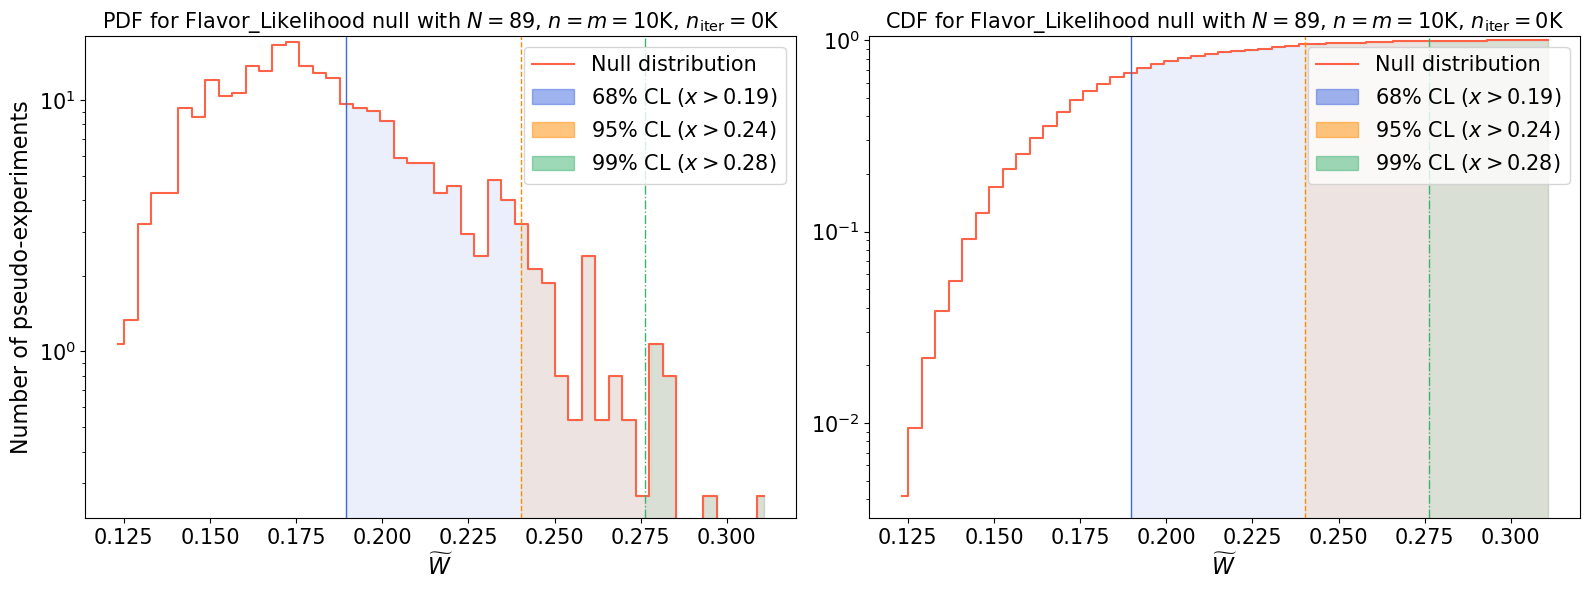

Time elapsed: 0.8555188691243529 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7f382c598d30>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f2d80662950>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f2d80662050>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f2d80661fc0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f2d80661f30>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1             10  $d_{\mathrm{MMD}}$   
2          12000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
1  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
2  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
3  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   
4  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...   

                                          thresholds  \
0  [[0.68, [652, 307], 0.0013765071468396436], [0...   
1  [[0.68, [652, 307], 0.050930650556438195], [0....   
2  [[0.68, [652, 307], 0.8974367088035801], [0.95...   
3  [[0.68, [652, 307], 0.9048142731690926], [0.95...   
4  [[0.68, [652, 307], 0.18961432108350815], [0.9...   

                                         null_figure  
0  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...  
1  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...  
2  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...  
3  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...  
4  results/Flavor_MsplineN/run_1/tests_poi/10K/nu...

In [24]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [25]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)[:,-14:-2]
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1200000 samples for dist_1_alt.


In [26]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(10_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(10_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)[:,-14:-2]

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [27]:
TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter*batch_size_test],
                                                      niter = niter,
                                                      batch_size_test = batch_size_test,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [28]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 17.92546554002911 seconds.
Thresholds for metric fgd: [[0.68, [652, 307], 0.0013765071468396436], [0.95, [912, 48], 0.009548281646451589], [0.99, [950, 9], 0.015565131483906817]]
Value of the test-statistic for the alternative hypothesis: 0.017789156912118367

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 120
batch_size = 10000
nchunks = 12
Iterating from 0 to 10 out of 120 .
Iterating from 10 to 20 out of 120 .


Iterating from 20 to 30 out of 120 .
Iterating from 30 to 40 out of 120 .
Iterating from 40 to 50 out of 120 .
Iterating from 50 to 60 out of 120 .
Iterating from 60 to 70 out of 120 .
Iterating from 70 to 80 out of 120 .
Iterating from 80 to 90 out of 120 .
Iterating from 90 to 100 out of 120 .
Iterating from 100 to 110 out of 120 .
Iterating from 110 to 120 out of 120 .
MMD metric calculation completed in 23.402052006684244 seconds.
Thresholds for metric mmd: [[0.68, [652, 307], 0.050930650556438195], [0.95, [912, 48], 0.5549859778853943], [0.99, [950, 9], 1.0098341511877607]]
Value of the test-statistic for the alternative hypothesis: 0.26283739398746775

------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 120
batch_size = 10000
KS tests calculation completed in 2.8995829531922936 seconds.
Thresholds for metric ks: [[0.68, [652, 307], 0.8974367088035801], [0.95, [912, 48], 1.0135195346058083], [0.99, [950, 9], 1.0712670829959772

## 20K

### Bootstrapping Null Hypothesis

In [ ]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '20K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '20K', "metrics_config.json")

In [ ]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 120, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 6, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 20_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 120

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000


FGD metric calculation completed in 66.53302986733615 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.59346767421812 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 59.862830822356045 seconds.

Testing from 360 to 480 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.648507255129516 seconds.

Testing from 480 to 600 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 0.00418197752639711], [0.95, [912, 48], 0.01620400060757239], [0.99, [950, 9], 0.02198562865948822]]
Computing time for metric fgd: 487.6796710425988
ThresholdS for metric mmd: [[0.68, [652, 307], 0.0034325345894217207], [0.95, [912, 48], 0.017853702901305724], [0.99, [950, 9], 0.028524948759155677]]
Computing time for metric mmd: 285.39760134369135
ThresholdS for metric ks: [[0.68, [652, 307], 0.8838838233659545], [0.95, [912, 48], 0.9463317225760768], [0.99, [950, 9], 0.9796213072811356]]
Computing time for metric ks: 55.186381065286696
ThresholdS for metric sks: [[0.68, [652, 307], 0.8908842129006357], [0.95, [912, 48], 0.9632210465632355], [0.99, [950, 9], 1.0160421771495707]]
Computing time for metric sks: 112.49582771398127
ThresholdS for metric swd: [[0.68, [652, 307], 0.13465882850286276], [0.95, [912, 48], 0.15046081373652706], [0.99, [950, 9], 0.16285798209612012]]
Computing time for metric swd: 79.8134570736438


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...  
1  [[0.68, [652, 307], 0.0034325345894217207], [0...  
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...  
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...  
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...

#### Plots of null-distributions

mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773
68%CL = 0.00418197752639711, 95%CL = 0.01620400060757239, 99%CL = 0.02198562865948822
mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


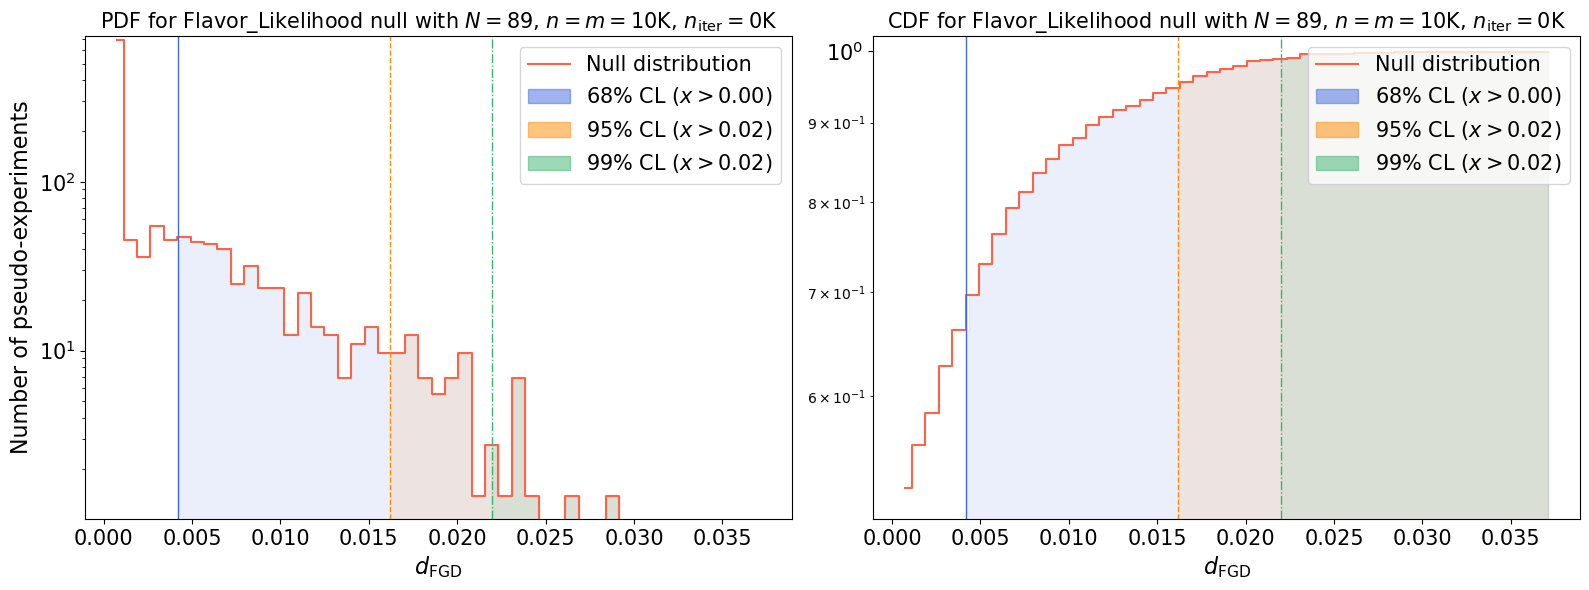

Time elapsed: 1.409290013834834 seconds.
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246
68%CL = 0.0034325345894217207, 95%CL = 0.017853702901305724, 99%CL = 0.028524948759155677
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


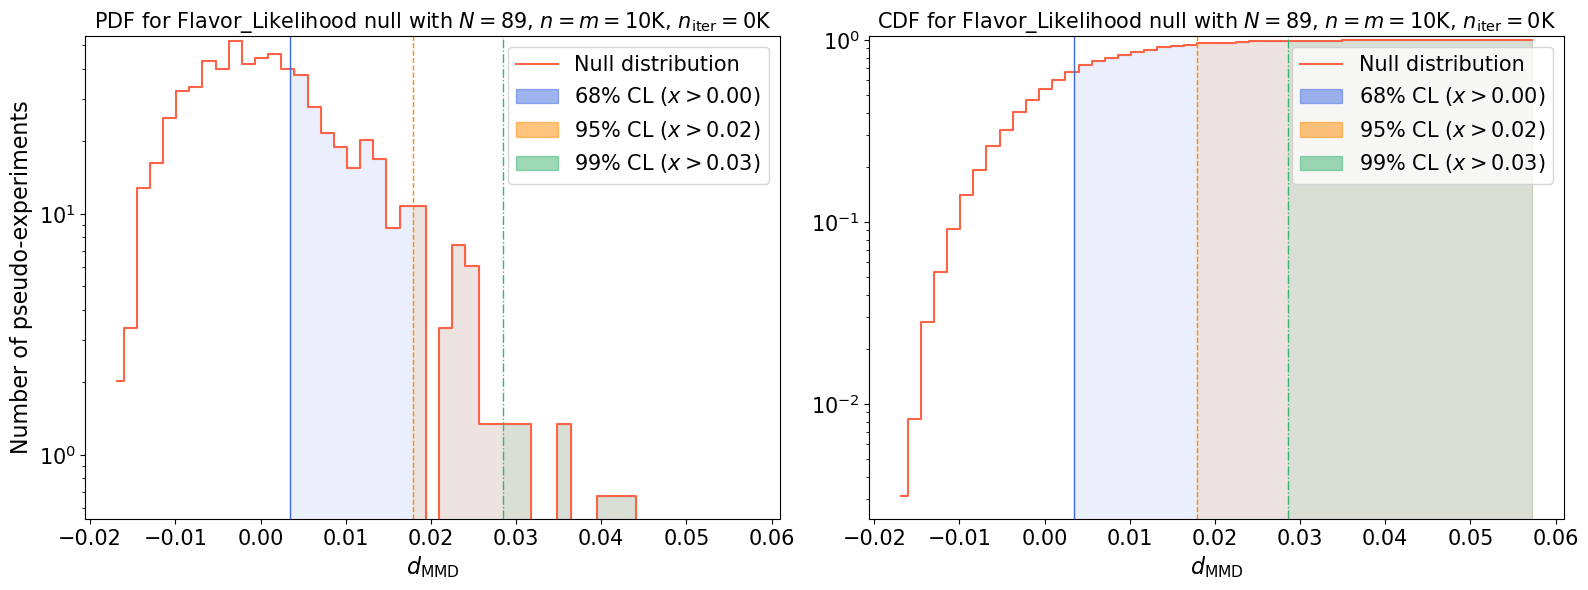

Time elapsed: 1.2647927645593882 seconds.
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855
68%CL = 0.8838838233659545, 95%CL = 0.9463317225760768, 99%CL = 0.9796213072811356
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


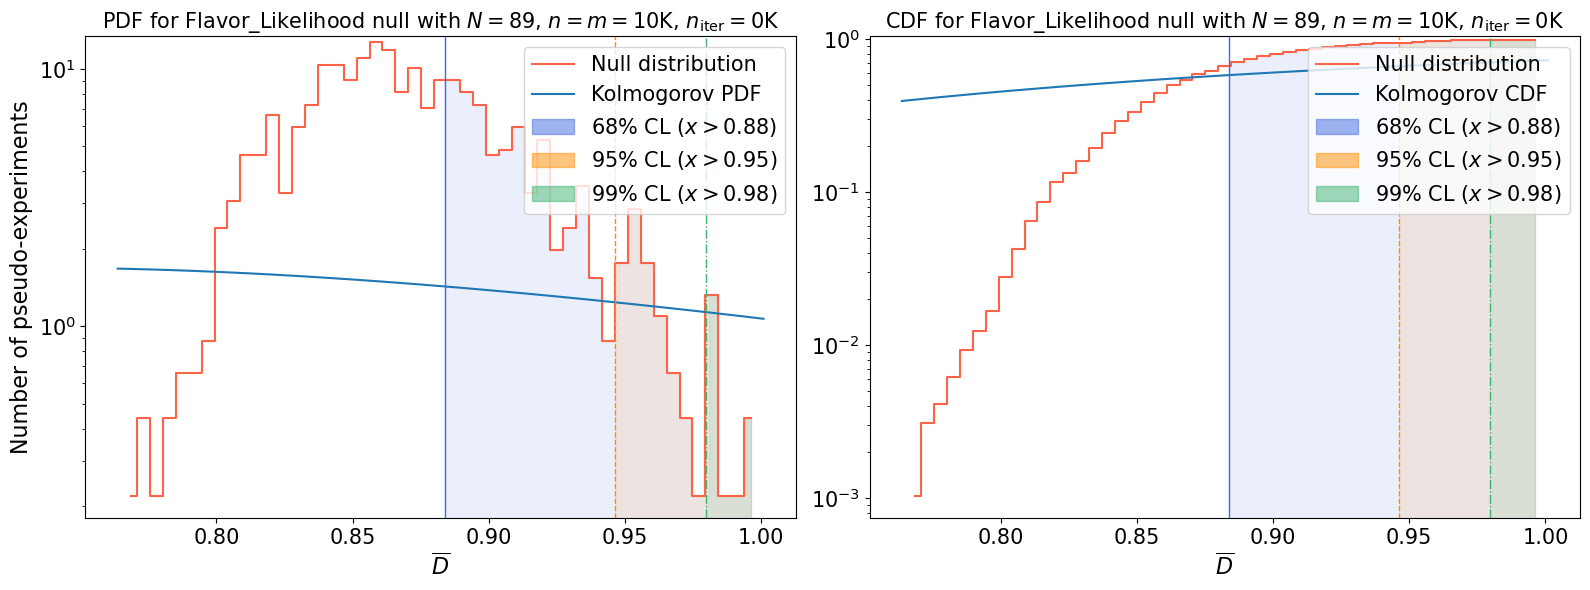

Time elapsed: 1.565953771583736 seconds.
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607
68%CL = 0.8908842129006357, 95%CL = 0.9632210465632355, 99%CL = 1.0160421771495707
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


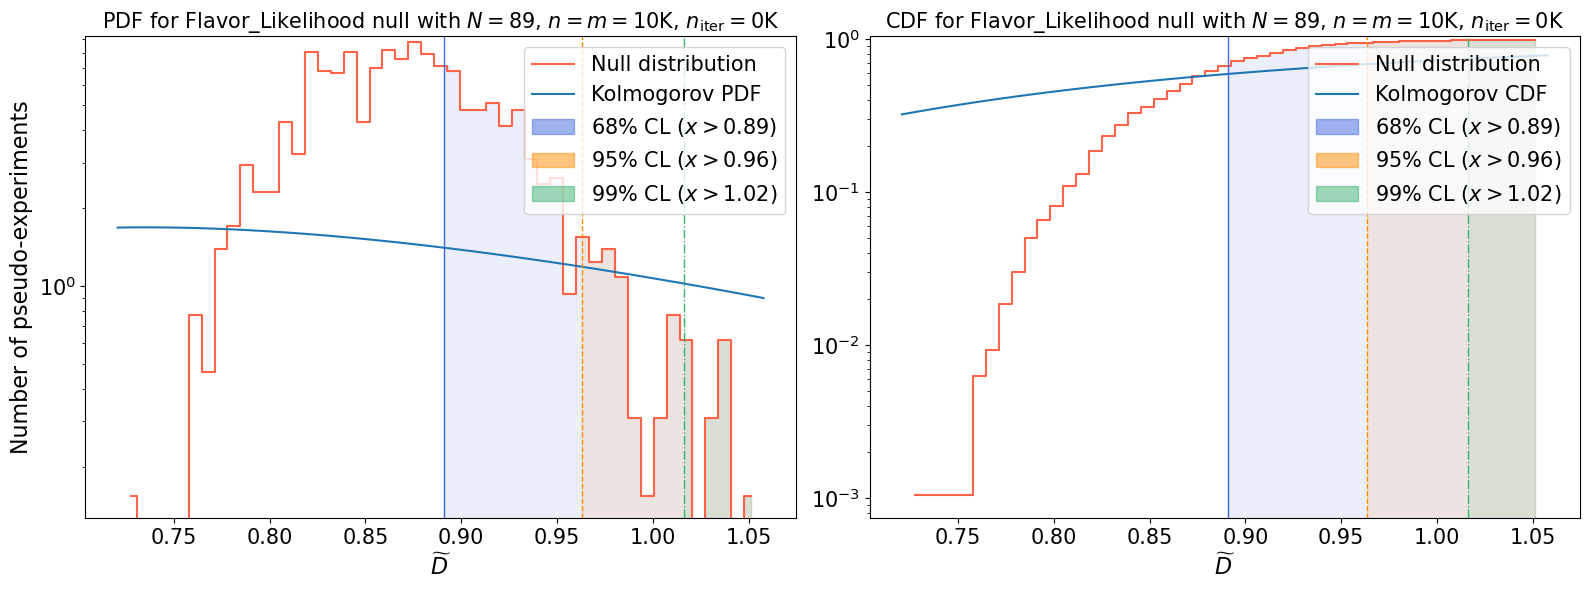

Time elapsed: 1.2074890760704875 seconds.
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595
68%CL = 0.13465882850286276, 95%CL = 0.15046081373652706, 99%CL = 0.16285798209612012
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


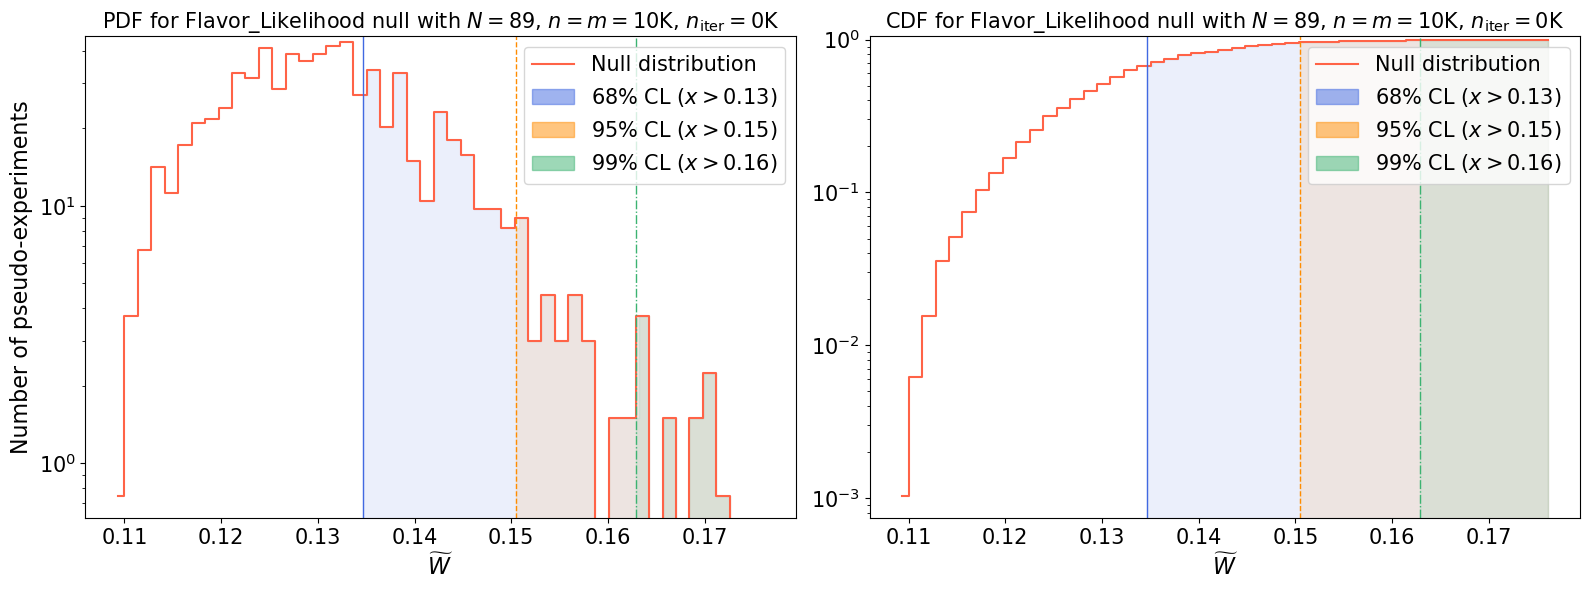

Time elapsed: 0.8995594084262848 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  \
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...   
1  [[0.68, [652, 307], 0.0034325345894217207], [0...   
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...   
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...   
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...   

                                         null_figure  
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [ ]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1200000 samples for dist_1_alt.


In [ ]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(10_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(10_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [ ]:
TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter*batch_size_test],
                                                      niter = niter // 4,
                                                      batch_size_test = batch_size_test * 4,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 30
batch_size = 40000
FGD metric calculation completed in 66.9560378966853 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0005718073521945083

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 30
batch_size = 40000
nchunks = 5
Iterating from 0 to 6 out of 30 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _ru

ResourceExhaustedError: Graph execution error:

Detected at node 'MatMul/pfor/MatMul' defined at (most recent call last):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_16096/1795225429.py", line 8, in <module>
      obj.Test_tf(max_vectorize = max_vectorize)
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 536, in Test_tf
      vals_list: DataType = compute_test(seed_generator = seed_generator,
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 519, in compute_test
      _, res = tf.while_loop(cond, body, [0, res])
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 511, in body
      chunk_result: DataTypeTF = batched_test(start, end, seed_generator = seed_generator) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 476, in batched_test
      vals_list: DataTypeTF = batched_test_sub(dist_1_k, dist_2_k) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 451, in batched_test_sub
      vals_list: DataTypeTF = tf.vectorized_map(loop_body, tf.range(tf.shape(dist_1_k_replica)[0])) # type: ignore
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
Node: 'MatMul/pfor/MatMul'
OOM when allocating tensor with shape[6,10000,10000] and type double on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node MatMul/pfor/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_batched_test_5331799]

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...


Running TF FGD calculation...
niter = 60
batch_size = 20000
FGD metric calculation completed in 61.467704774811864 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0011657086141109885

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 60
batch_size = 20000
nchunks = 10
Iterating from 0 to 6 out of 60 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/loc

## 50K

### Bootstrapping Null Hypothesis

In [ ]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '50K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '50K', "metrics_config.json")

In [ ]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 120, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 6, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 20_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 120

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000


FGD metric calculation completed in 66.53302986733615 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.59346767421812 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 59.862830822356045 seconds.

Testing from 360 to 480 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.648507255129516 seconds.

Testing from 480 to 600 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 0.00418197752639711], [0.95, [912, 48], 0.01620400060757239], [0.99, [950, 9], 0.02198562865948822]]
Computing time for metric fgd: 487.6796710425988
ThresholdS for metric mmd: [[0.68, [652, 307], 0.0034325345894217207], [0.95, [912, 48], 0.017853702901305724], [0.99, [950, 9], 0.028524948759155677]]
Computing time for metric mmd: 285.39760134369135
ThresholdS for metric ks: [[0.68, [652, 307], 0.8838838233659545], [0.95, [912, 48], 0.9463317225760768], [0.99, [950, 9], 0.9796213072811356]]
Computing time for metric ks: 55.186381065286696
ThresholdS for metric sks: [[0.68, [652, 307], 0.8908842129006357], [0.95, [912, 48], 0.9632210465632355], [0.99, [950, 9], 1.0160421771495707]]
Computing time for metric sks: 112.49582771398127
ThresholdS for metric swd: [[0.68, [652, 307], 0.13465882850286276], [0.95, [912, 48], 0.15046081373652706], [0.99, [950, 9], 0.16285798209612012]]
Computing time for metric swd: 79.8134570736438


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...  
1  [[0.68, [652, 307], 0.0034325345894217207], [0...  
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...  
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...  
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...

#### Plots of null-distributions

mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773
68%CL = 0.00418197752639711, 95%CL = 0.01620400060757239, 99%CL = 0.02198562865948822
mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


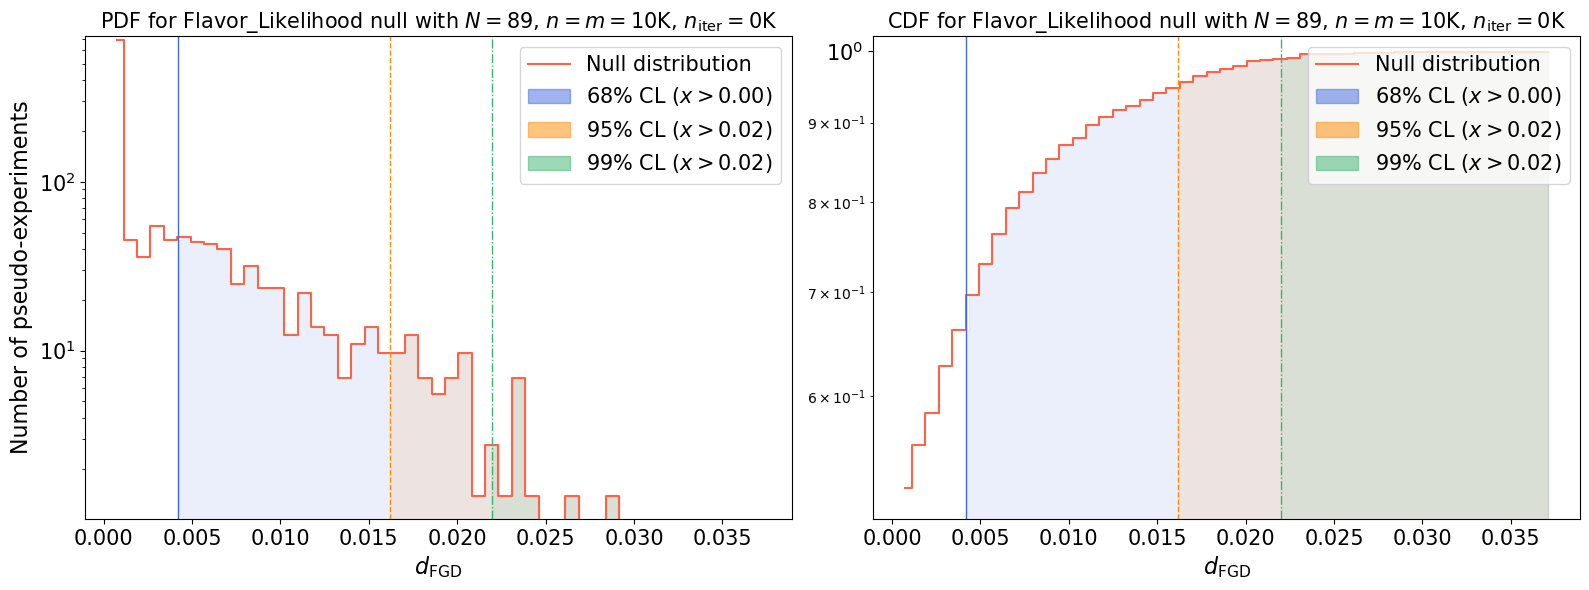

Time elapsed: 1.409290013834834 seconds.
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246
68%CL = 0.0034325345894217207, 95%CL = 0.017853702901305724, 99%CL = 0.028524948759155677
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


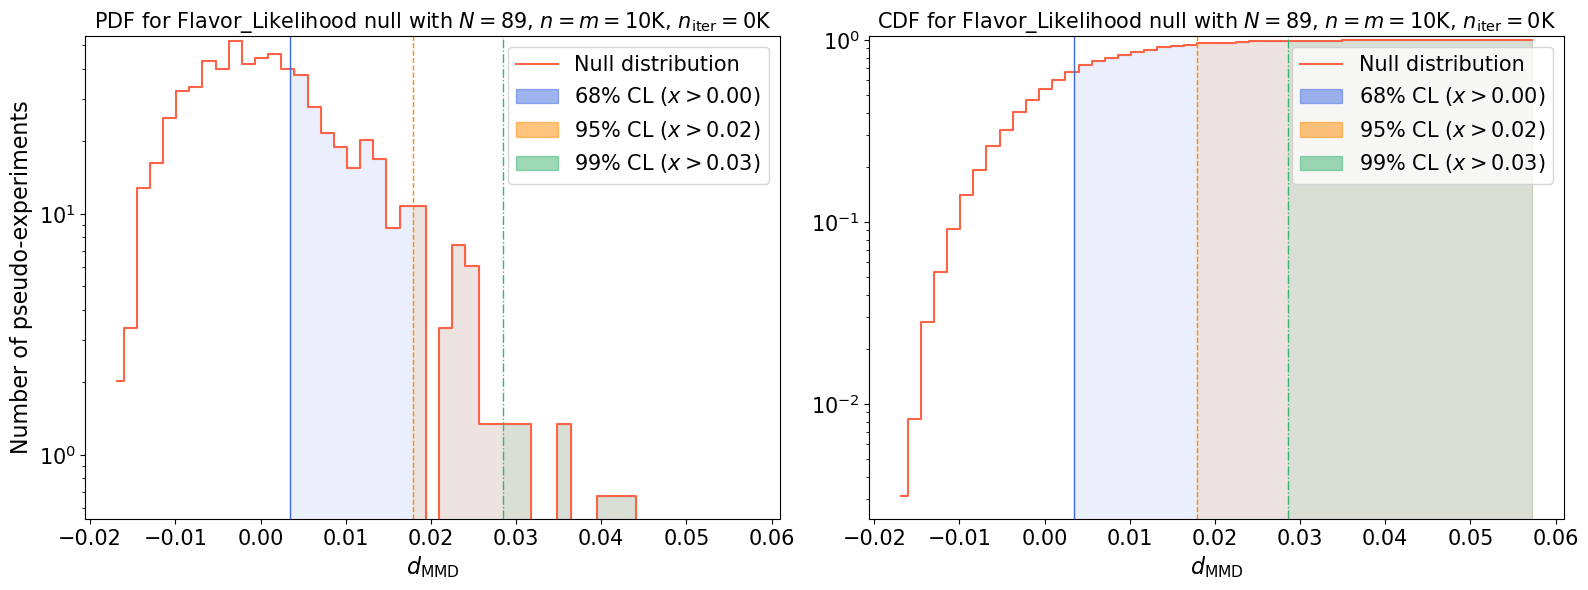

Time elapsed: 1.2647927645593882 seconds.
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855
68%CL = 0.8838838233659545, 95%CL = 0.9463317225760768, 99%CL = 0.9796213072811356
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


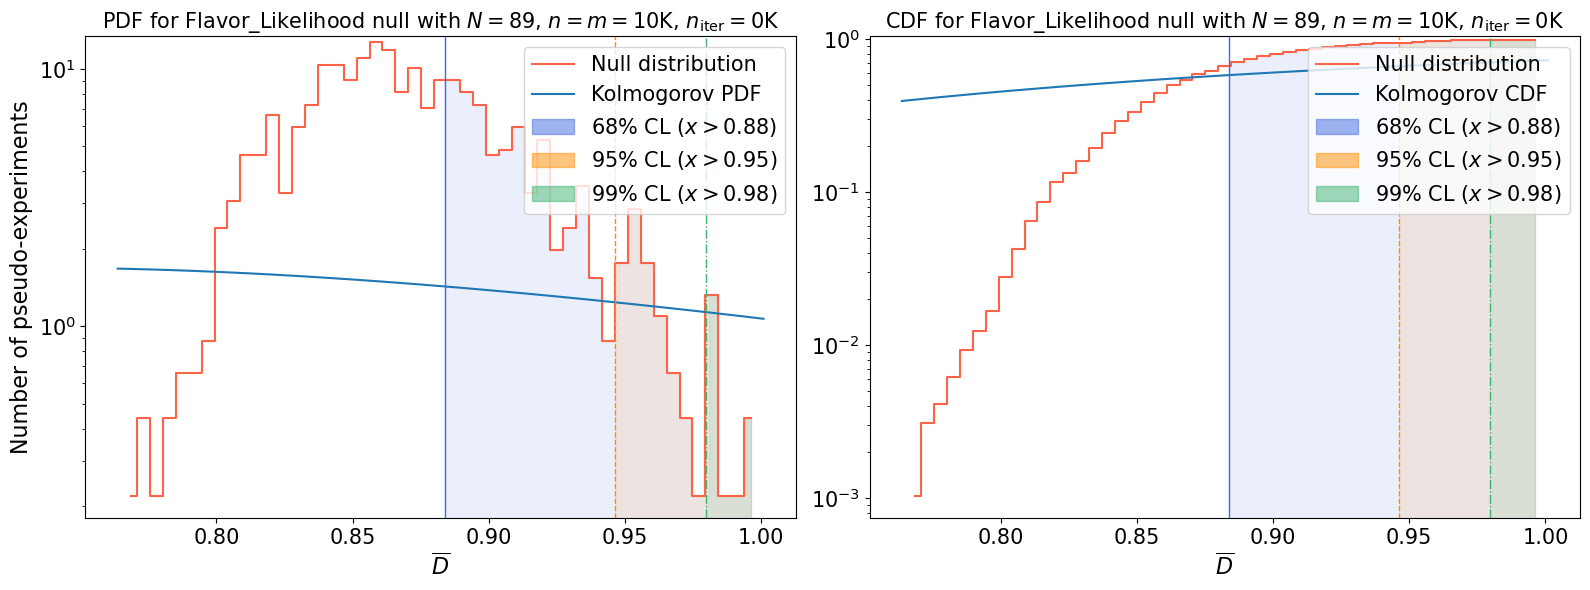

Time elapsed: 1.565953771583736 seconds.
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607
68%CL = 0.8908842129006357, 95%CL = 0.9632210465632355, 99%CL = 1.0160421771495707
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


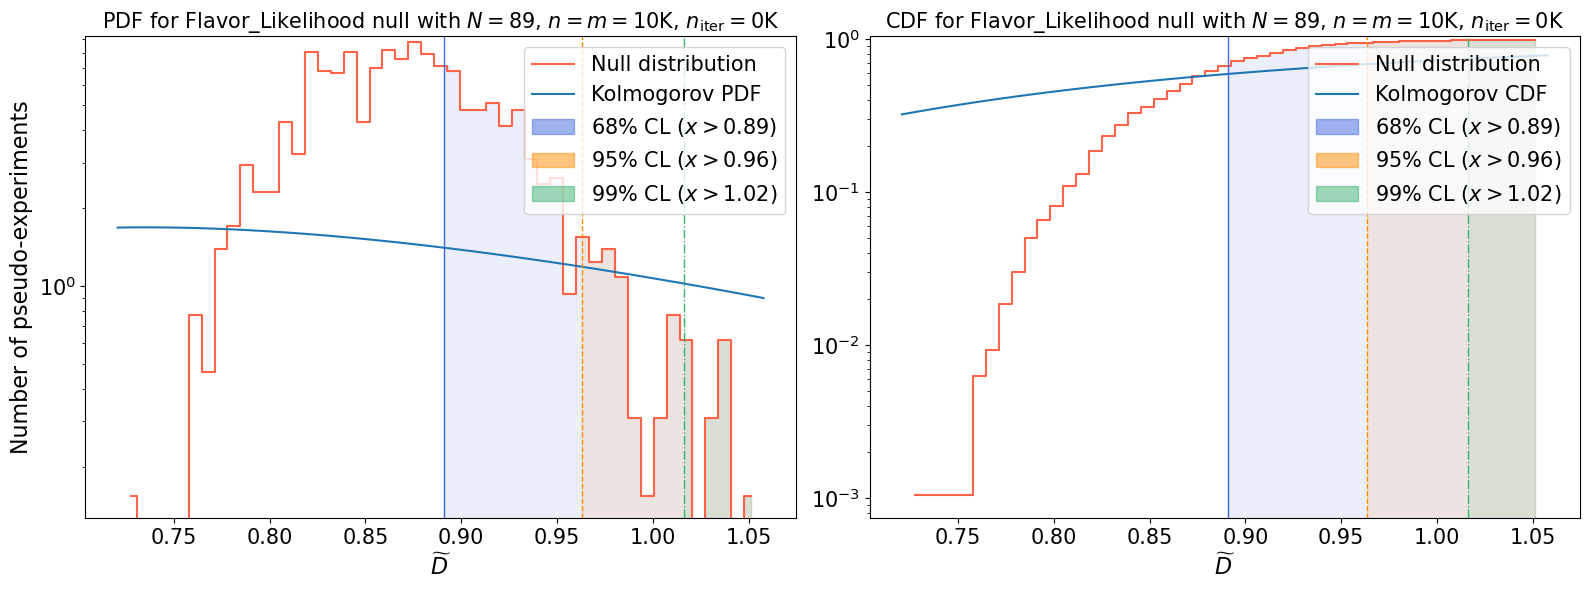

Time elapsed: 1.2074890760704875 seconds.
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595
68%CL = 0.13465882850286276, 95%CL = 0.15046081373652706, 99%CL = 0.16285798209612012
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


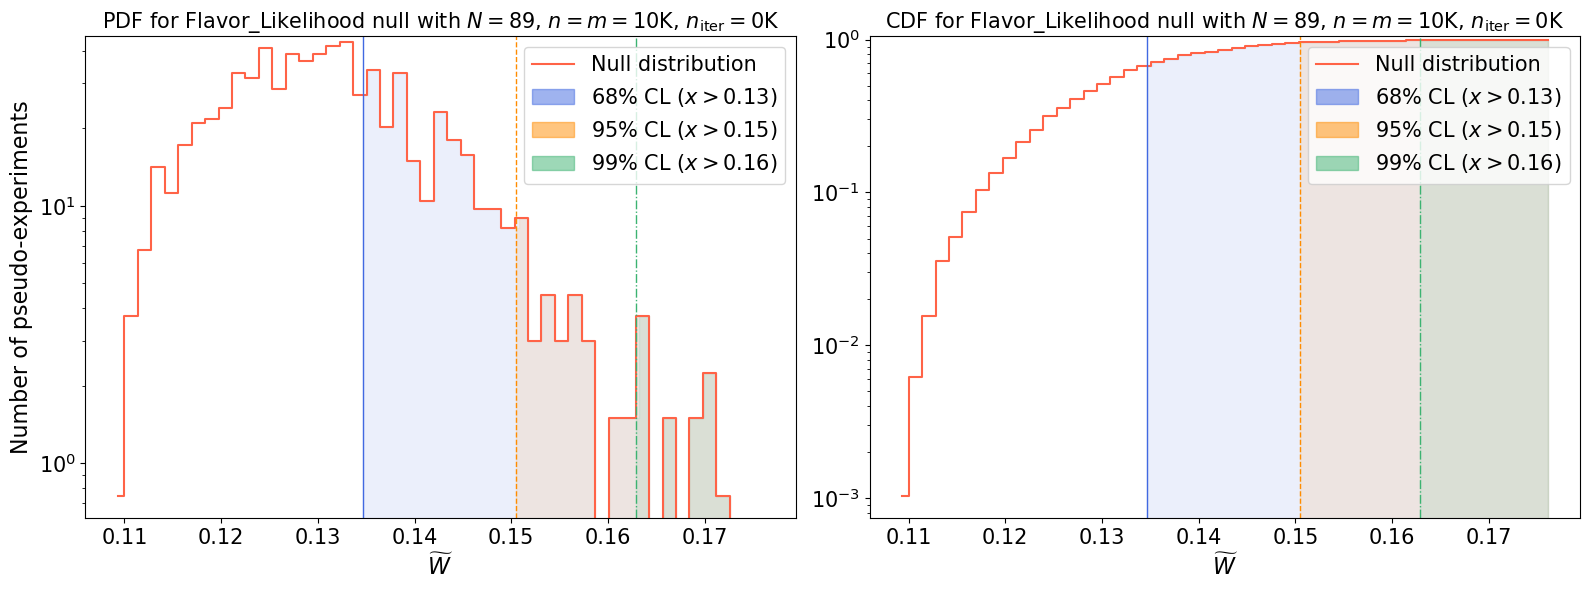

Time elapsed: 0.8995594084262848 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  \
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...   
1  [[0.68, [652, 307], 0.0034325345894217207], [0...   
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...   
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...   
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...   

                                         null_figure  
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [ ]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1200000 samples for dist_1_alt.


In [ ]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(10_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(10_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [ ]:
TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter*batch_size_test],
                                                      niter = niter // 4,
                                                      batch_size_test = batch_size_test * 4,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 30
batch_size = 40000
FGD metric calculation completed in 66.9560378966853 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0005718073521945083

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 30
batch_size = 40000
nchunks = 5
Iterating from 0 to 6 out of 30 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _ru

ResourceExhaustedError: Graph execution error:

Detected at node 'MatMul/pfor/MatMul' defined at (most recent call last):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_16096/1795225429.py", line 8, in <module>
      obj.Test_tf(max_vectorize = max_vectorize)
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 536, in Test_tf
      vals_list: DataType = compute_test(seed_generator = seed_generator,
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 519, in compute_test
      _, res = tf.while_loop(cond, body, [0, res])
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 511, in body
      chunk_result: DataTypeTF = batched_test(start, end, seed_generator = seed_generator) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 476, in batched_test
      vals_list: DataTypeTF = batched_test_sub(dist_1_k, dist_2_k) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 451, in batched_test_sub
      vals_list: DataTypeTF = tf.vectorized_map(loop_body, tf.range(tf.shape(dist_1_k_replica)[0])) # type: ignore
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
Node: 'MatMul/pfor/MatMul'
OOM when allocating tensor with shape[6,10000,10000] and type double on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node MatMul/pfor/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_batched_test_5331799]

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...


Running TF FGD calculation...
niter = 60
batch_size = 20000
FGD metric calculation completed in 61.467704774811864 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0011657086141109885

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 60
batch_size = 20000
nchunks = 10
Iterating from 0 to 6 out of 60 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/loc

## 100K

### Bootstrapping Null Hypothesis

In [ ]:
null_hypotheses_dir: str = Utils.define_dir(os.path.join(tests_dir, '100K', 'null_hypotheses'))
metrics_config_file = os.path.join(tests_dir, '100K', "metrics_config.json")

In [ ]:
niter_tot = 1_000
batch_size_test = 10_000
namples = len(dataset) // 2
niter = namples // batch_size_test
nbootstrap = niter_tot // niter
niter_tot = niter * nbootstrap
print(f"niter: {niter}, nbootstrap: {nbootstrap}")

def shuffle_dataset(seed):
    return tf.random.shuffle(dataset, seed=seed)

start = timer()
l = len(dataset) // 2
dstmp = shuffle_dataset(seed = 0)
dist_1_null = tf.cast(dstmp[:l], tf.float64)
dist_2_null = tf.cast(dstmp[l:], tf.float64)
del(dstmp)

TwoSampleTestInputsNull = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_null[:niter*batch_size_test],
                                                       dist_2_input = dist_2_null[:niter*batch_size_test],
                                                       niter = niter,
                                                       batch_size_test = batch_size_test,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = True)
FGDMetricNull = GMetrics.FGDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   num_batches = 20, # to be included in metric kwargs
                                   num_points = 10, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
MMDMetricNull = GMetrics.MMDMetric(TwoSampleTestInputsNull,
                                   progress_bar = True,
                                   verbose = True,
                                   degree = 4, # to be included in metric kwargs
                                   block_size = 10_000, # to be included in metric kwargs
                                   normalise = False) # to be included in metric kwargs
KSTestNull = GMetrics.KSTest(TwoSampleTestInputsNull,
                             progress_bar = True,
                             verbose = True)
SKSTestNull = GMetrics.SKSTest(TwoSampleTestInputsNull,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
SWDMetricNull = GMetrics.SWDMetric(TwoSampleTestInputsNull,
                                   nslices = 100, # to be included in metric kwargs
                                   seed_slicing = 0, # to be included in metric kwargs
                                   progress_bar = True,
                                   verbose = True)

niter: 120, nbootstrap: 8
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
unique_key = "config_flavor_nsamples_"+str(TwoSampleTestInputsNull.batch_size_test)+"_niter_"+str(niter_tot)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetricNull",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 120, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"FGD.json")},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetricNull" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "max_vectorize": 6, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"MMD.json")},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTestNull",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 20_000,
                                       "latex": "$\overline{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"KS.json")},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTestNull",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SKS.json")},
                               "swd": {"name": "swd",
                                      "object_name": "SWDMetricNull",
                                      "class_name": "GMetrics.SWDMetric", 
                                      "kwargs": {"nslices": 100, 
                                                 "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "max_vectorize": 200,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": os.path.join(null_hypotheses_dir,"SWD.json")}}}

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        print("\n===========================================================")
        print(f"Testing from 0 to {niter} of {niter * nbootstrap} samples.")
        obj.Test_tf(max_vectorize = max_vectorize)
        for i in range(1, nbootstrap):
            l = len(dataset) // 2
            dstmp = shuffle_dataset(seed = 1000 * i + i)
            dist_1_null = tf.cast(dstmp[:l], tf.float64)
            dist_2_null = tf.cast(dstmp[l:], tf.float64)
            #KSTestNull.Inputs.dist_1_input = dist_1 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_1_num = dist_1_null[:niter*batch_size_test] # Overwriting the _dist_1_num attribute. Less consistent, but         faster
            #KSTestNull.Inputs.dist_2_input = dist_2 # This is the consistent way, but slower
            TwoSampleTestInputsNull._dist_2_num = dist_2_null[:niter*batch_size_test] # Overwriting the _dist_2_num attribute. Less consistent, but         faster
            print("\n===========================================================")
            print(f"Testing from {i * niter} to {(i+1) * niter} of {niter * nbootstrap} samples.")
            obj.Test_tf(max_vectorize = max_vectorize)
        del(dstmp)
        end = timer()
        print(f"All done in: {end-start:.2f} s.")
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fgd with max_vectorize = 120

Testing from 0 to 120 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000


FGD metric calculation completed in 66.53302986733615 seconds.

Testing from 120 to 240 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.59346767421812 seconds.

Testing from 240 to 360 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 59.862830822356045 seconds.

Testing from 360 to 480 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation completed in 60.648507255129516 seconds.

Testing from 480 to 600 of 960 samples.

------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 120
batch_size = 10000
FGD metric calculation

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[0].__dict__['computing_time']
    for i in range(1,len(obj.Results)):
        null_time += obj.Results[i].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [652, 307], 0.00418197752639711], [0.95, [912, 48], 0.01620400060757239], [0.99, [950, 9], 0.02198562865948822]]
Computing time for metric fgd: 487.6796710425988
ThresholdS for metric mmd: [[0.68, [652, 307], 0.0034325345894217207], [0.95, [912, 48], 0.017853702901305724], [0.99, [950, 9], 0.028524948759155677]]
Computing time for metric mmd: 285.39760134369135
ThresholdS for metric ks: [[0.68, [652, 307], 0.8838838233659545], [0.95, [912, 48], 0.9463317225760768], [0.99, [950, 9], 0.9796213072811356]]
Computing time for metric ks: 55.186381065286696
ThresholdS for metric sks: [[0.68, [652, 307], 0.8908842129006357], [0.95, [912, 48], 0.9632210465632355], [0.99, [950, 9], 1.0160421771495707]]
Computing time for metric sks: 112.49582771398127
ThresholdS for metric swd: [[0.68, [652, 307], 0.13465882850286276], [0.95, [912, 48], 0.15046081373652706], [0.99, [950, 9], 0.16285798209612012]]
Computing time for metric swd: 79.8134570736438


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...  
1  [[0.68, [652, 307], 0.0034325345894217207], [0...  
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...  
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...  
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...

#### Plots of null-distributions

mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773
68%CL = 0.00418197752639711, 95%CL = 0.01620400060757239, 99%CL = 0.02198562865948822
mu = 0.003661744032221489 +/- 9.650240194676533e-07
sigma = 0.005468105307024263 +/- 0.00020772526952428773


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


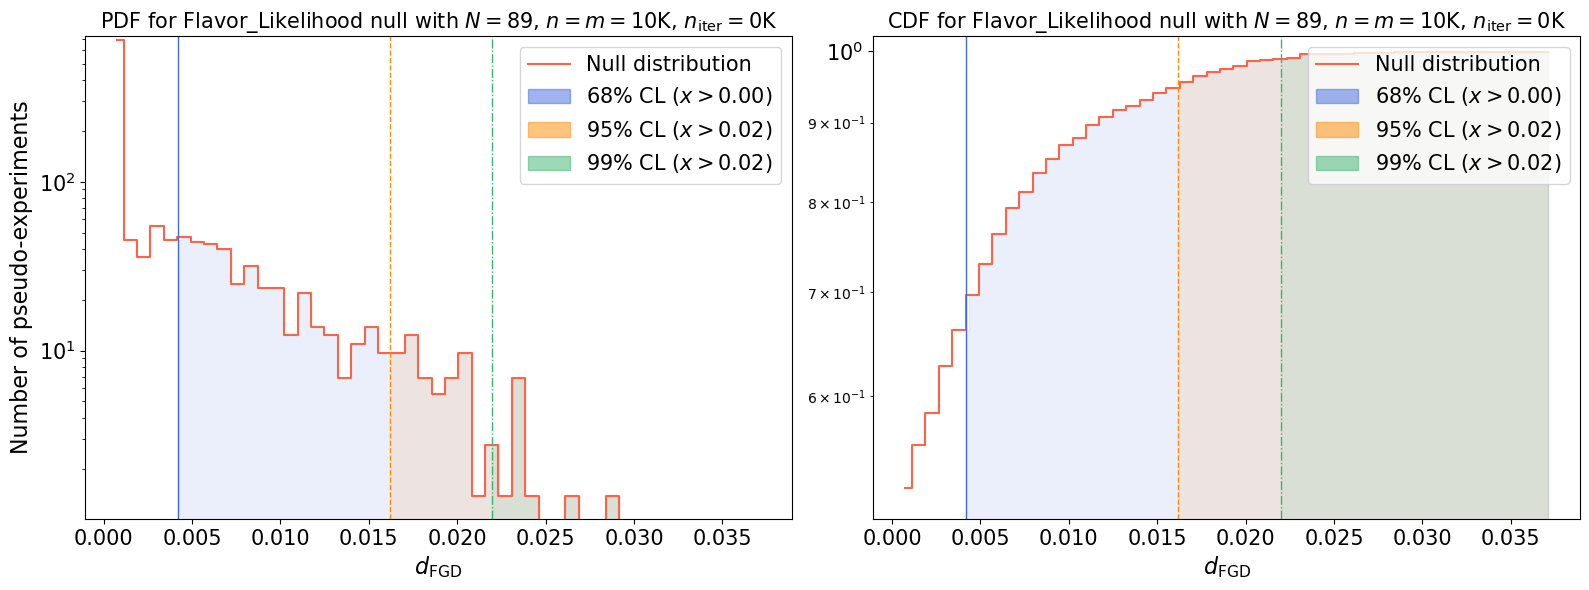

Time elapsed: 1.409290013834834 seconds.
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246
68%CL = 0.0034325345894217207, 95%CL = 0.017853702901305724, 99%CL = 0.028524948759155677
mu = 0.0006159555437323938 +/- 2.974098019244521e-06
sigma = 0.009599430024130598 +/- 0.00031508511785647246


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


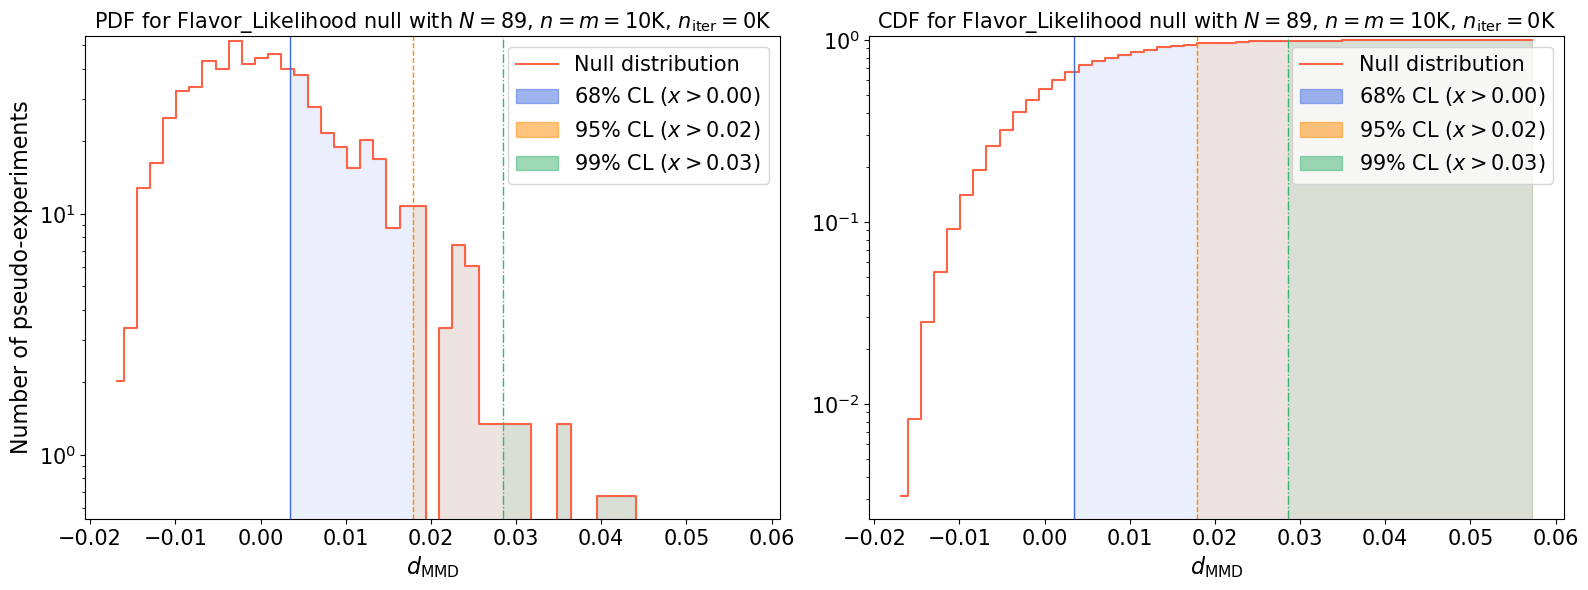

Time elapsed: 1.2647927645593882 seconds.
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855
68%CL = 0.8838838233659545, 95%CL = 0.9463317225760768, 99%CL = 0.9796213072811356
mu = 0.8680917851603606 +/- 5.269564965381253e-05
sigma = 0.04040686808222549 +/- 0.0009628209433005855


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


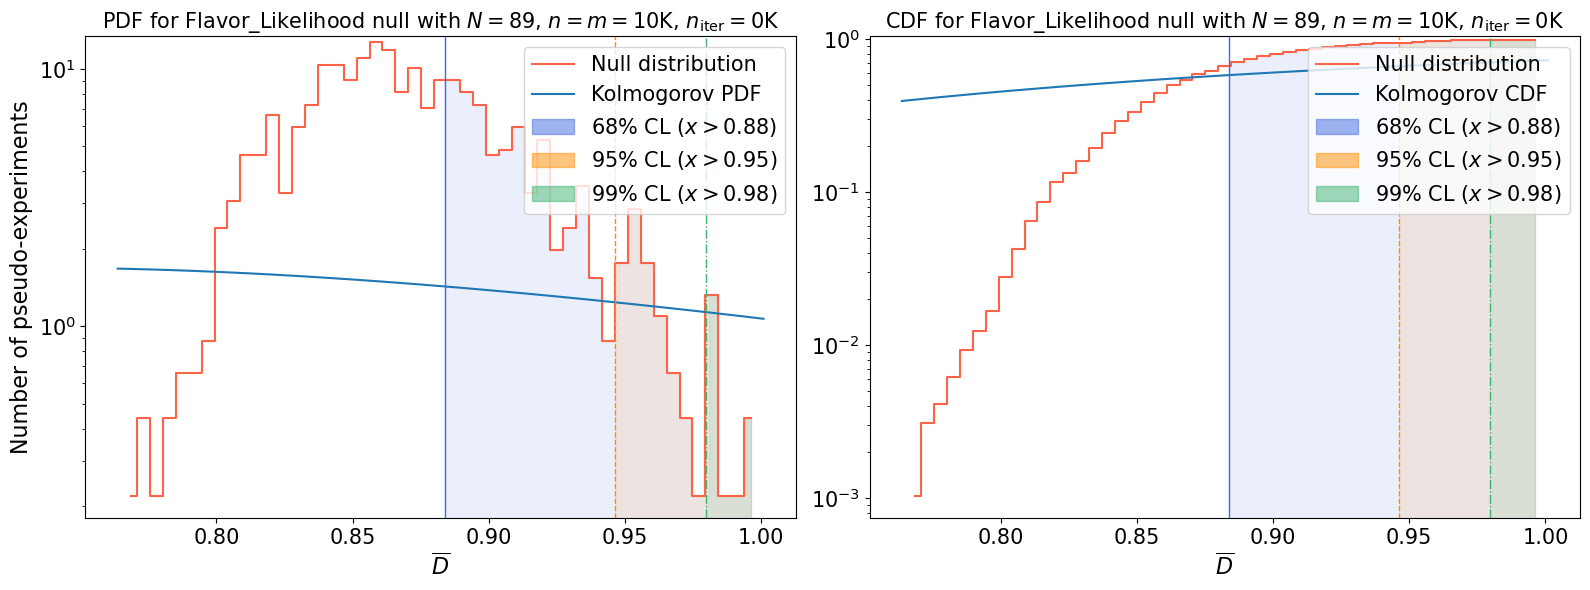

Time elapsed: 1.565953771583736 seconds.
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607
68%CL = 0.8908842129006357, 95%CL = 0.9632210465632355, 99%CL = 1.0160421771495707
mu = 0.8697998972108056 +/- 8.936469536778082e-05
sigma = 0.05261999444304906 +/- 0.0013086137666823607


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


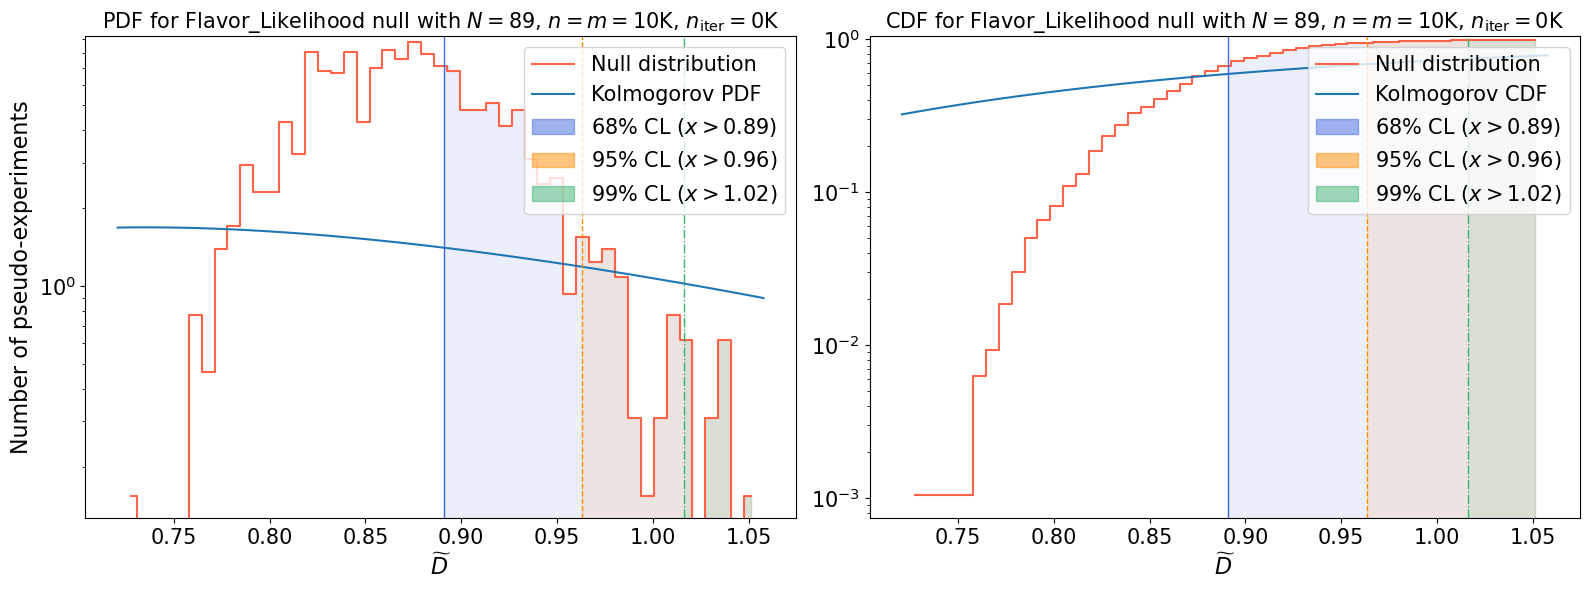

Time elapsed: 1.2074890760704875 seconds.
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595
68%CL = 0.13465882850286276, 95%CL = 0.15046081373652706, 99%CL = 0.16285798209612012
mu = 0.1308066173288348 +/- 3.926220627571124e-06
sigma = 0.011029483071882925 +/- 0.00029844157188381595


/tmp/ipykernel_4441/2595869255.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_4441/2595869255.py:81: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_4441/2595869255.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_4441/2595869255.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


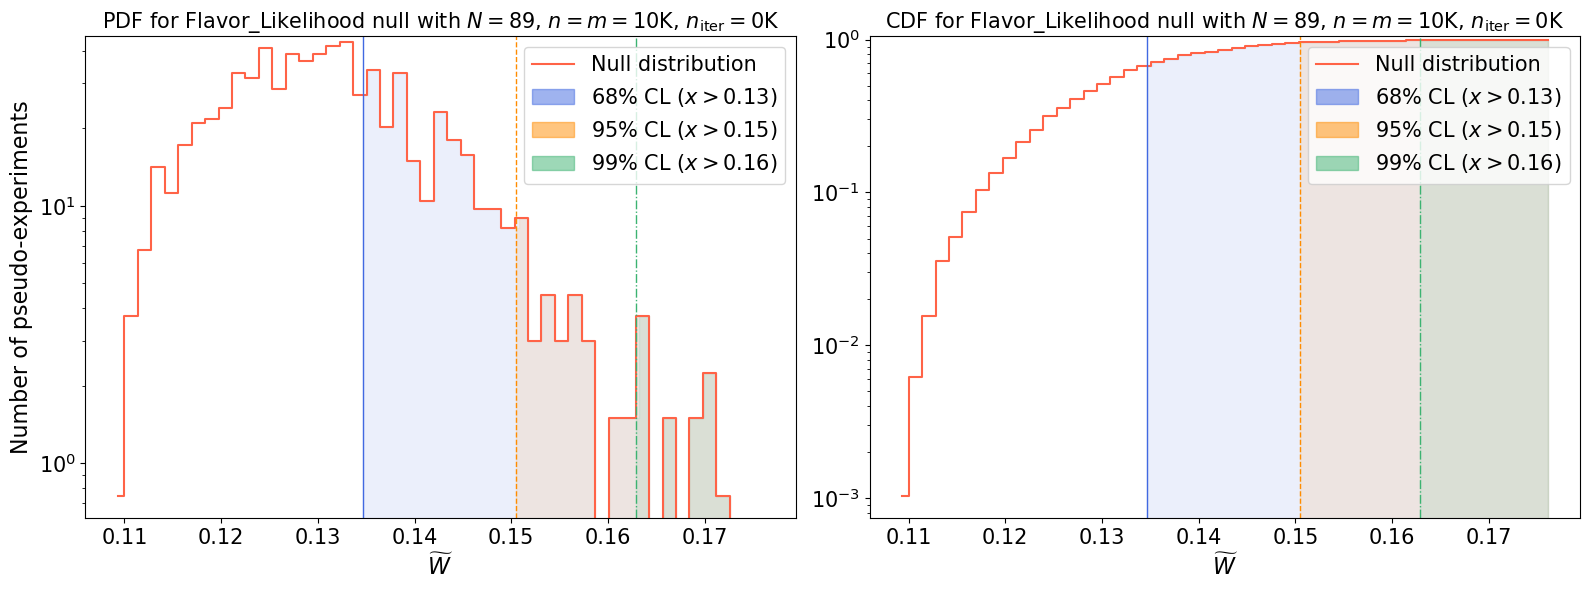

Time elapsed: 0.8995594084262848 seconds.


name    object_name          class_name  \
0  fgd  FGDMetricNull  GMetrics.FGDMetric   
1  mmd  MMDMetricNull  GMetrics.MMDMetric   
2   ks     KSTestNull     GMetrics.KSTest   
3  sks    SKSTestNull    GMetrics.SKSTest   
4  swd  SWDMetricNull  GMetrics.SWDMetric   

                                              kwargs       result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...      metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...      metric_list   
2                                                 {}  statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}     metric_means   
4                {'nslices': 100, 'seed_slicing': 0}     metric_means   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7fa41c38ff40>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7f9f981f43a0>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7f9f981f45e0>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7f9f981f4e50>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7f9f981f4430>  lambda ns, ndims: np.sqrt(ns/ndims)   

   max_vectorize               latex  \
0            120  $d_{\mathrm{FGD}}$   
1              6  $d_{\mathrm{MMD}}$   
2          20000      $\overline{D}$   
3            200     $\widetilde{D}$   
4            200     $\widetilde{W}$   

                                           null_file  \
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...   
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...   

                                          thresholds  \
0  [[0.68, [652, 307], 0.00418197752639711], [0.9...   
1  [[0.68, [652, 307], 0.0034325345894217207], [0...   
2  [[0.68, [652, 307], 0.8838838233659545], [0.95...   
3  [[0.68, [652, 307], 0.8908842129006357], [0.95...   
4  [[0.68, [652, 307], 0.13465882850286276], [0.9...   

                                         null_figure  
0  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
1  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
2  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
3  results/Flavor_MsplineN/run_1/tests/10K/null_h...  
4  results/Flavor_MsplineN/run_1/tests/10K/null_h...

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null  = np.array(obj.Results[0].result_value[result_key])
    for i in range(1,len(obj.Results)):
        dist_null = np.concatenate((dist_null, np.array(obj.Results[i].result_value[result_key])))
    dist_null = dist_null * scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for Flavor_Likelihood null with $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

### Alternative hypothesis

In [ ]:
l = len(dataset) // 2
dstmp = tf.random.shuffle(dataset, seed = 0)
dist_1_alt = tf.cast(dstmp[:l], tf.float64)
del(dstmp)
print(f"Available {len(dist_1_alt)} samples for dist_1_alt.")

Available 1200000 samples for dist_1_alt.


In [ ]:
print("i=0")
dist_2_alt = postprocess_data(NFObject.nf_dist.sample(10_000, seed = 0).numpy(),means,stds)
for i in range(1,120):
    print(f"i={i}")
    dist_2_alt = np.concatenate((dist_2_alt,postprocess_data(NFObject.nf_dist.sample(10_000, seed = 1000 * i + i).numpy(),means,stds)),axis=0)
dist_2_alt = tf.cast(dist_2_alt, tf.float64)

i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119


In [ ]:
TwoSampleTestInputsAlt = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1_alt[:niter*batch_size_test],
                                                      dist_2_input = dist_2_alt[:niter*batch_size_test],
                                                      niter = niter // 4,
                                                      batch_size_test = batch_size_test * 4,
                                                      small_sample_threshold = 1e7,
                                                      dtype_input = tf.float64,
                                                      seed_input = 0,
                                                      use_tf = True,
                                                      mirror_strategy = False,
                                                      verbose = True)

FGDMetricAlt = GMetrics.FGDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  num_batches = 20, # to be included in metric kwargs
                                  num_points = 10, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
MMDMetricAlt = GMetrics.MMDMetric(TwoSampleTestInputsAlt,
                                  progress_bar = True,
                                  verbose = True,
                                  degree = 4, # to be included in metric kwargs
                                  block_size = 10_000, # to be included in metric kwargs
                                  normalise = False) # to be included in metric kwargs
KSTestAlt = GMetrics.KSTest(TwoSampleTestInputsAlt,
                            progress_bar = True,
                            verbose = True)
SKSTestAlt = GMetrics.SKSTest(TwoSampleTestInputsAlt,
                              nslices = 100, # to be included in metric kwargs
                              seed_slicing = 0, # to be included in metric kwargs
                              progress_bar = True,
                              verbose = True)
SWDMetricAlt = GMetrics.SWDMetric(TwoSampleTestInputsAlt,
                                  nslices = 100, # to be included in metric kwargs
                                  seed_slicing = 0, # to be included in metric kwargs
                                  progress_bar = True,
                                  verbose = True)

Parsing input distribution...


Input distribution is a numeric numpy array or tf.Tensor.
Parsing input distribution...
Input distribution is a numeric numpy array or tf.Tensor.
Checking and setting numerical distributions.
Returning dist_num.
Returning dist_num.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...
Running TF FGD calculation...
niter = 30
batch_size = 40000
FGD metric calculation completed in 66.9560378966853 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0005718073521945083

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 30
batch_size = 40000
nchunks = 5
Iterating from 0 to 6 out of 30 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _ru

ResourceExhaustedError: Graph execution error:

Detected at node 'MatMul/pfor/MatMul' defined at (most recent call last):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_16096/1795225429.py", line 8, in <module>
      obj.Test_tf(max_vectorize = max_vectorize)
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 536, in Test_tf
      vals_list: DataType = compute_test(seed_generator = seed_generator,
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 519, in compute_test
      _, res = tf.while_loop(cond, body, [0, res])
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 511, in body
      chunk_result: DataTypeTF = batched_test(start, end, seed_generator = seed_generator) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 476, in batched_test
      vals_list: DataTypeTF = batched_test_sub(dist_1_k, dist_2_k) # type: ignore
    File "/local_data/scratch/rtorre/projects/NFLikelihoodsMetrics/GMetrics/metrics/mmd.py", line 451, in batched_test_sub
      vals_list: DataTypeTF = tf.vectorized_map(loop_body, tf.range(tf.shape(dist_1_k_replica)[0])) # type: ignore
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 5025, in while_fn
      while_outputs = control_flow_ops.while_loop(
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/parallel_for/pfor.py", line 4485, in f
      [converter._convert_helper(x).t for x in func._func_graph_outputs])
    [Previous line repeated 1 more time]
Node: 'MatMul/pfor/MatMul'
OOM when allocating tensor with shape[6,10000,10000] and type double on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node MatMul/pfor/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_batched_test_5331799]

In [ ]:
for metric in list(metrics_config[unique_key].values()):
    file = metric["null_file"]
    name = metric["name"]
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"].replace("Null","Alt"))
    obj.Test_tf(max_vectorize = max_vectorize)
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_alt  = np.array(obj.Results[-1].result_value[result_key]) * scale_func(ns, ndims)
    print(f"Thresholds for metric {name}: {metric['thresholds']}")
    print(f"Value of the test-statistic for the alternative hypothesis: {np.mean(dist_alt)}")


------------------------------------------
Starting FGD metric calculation...


Running TF FGD calculation...
niter = 60
batch_size = 20000
FGD metric calculation completed in 61.467704774811864 seconds.
Thresholds for metric fgd: [[0.68, [1305, 614], 0.004396259699069913], [0.95, [1824, 96], 0.01573768514235728], [0.99, [1900, 19], 0.023031105295734322]]
Value of the test-statistic for the alternative hypothesis: 0.0011657086141109885

------------------------------------------
Starting MMD metric calculation...
Running TF MMD calculation...
niter = 60
batch_size = 20000
nchunks = 10
Iterating from 0 to 6 out of 60 .
ERROR:tensorflow:Error: Input value Tensor("while/boolean_mask/GatherV2:0", shape=(None, 89), dtype=float32) has dtype <dtype: 'float32'>, but expected dtype <dtype: 'float64'>.  This leads to undefined behavior and will be an error in future versions of TensorFlow.  Traceback:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/loc